In [42]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

a = 6.11 
b = 6.9
c = 2
p = [0.6, 0.7, 0.8, 0.9]

INTERARRIVAL_RATE = 2/(a+b)              # λ_i
ARRIVAL_RATE = c * INTERARRIVAL_RATE     # λ = c * λ_i
NUMBER_OF_JOBS = 100

In [43]:
def job_generator(env, server):
    for i in range(NUMBER_OF_JOBS):
        interarrival_time = random.uniform(a, b)
        yield env.timeout(interarrival_time)
        arrivals.append(env.now)
        env.process(arrival(f'Job {i + 1}', env, server))

In [44]:
def arrival(name,env,server):
    arrival_time = env.now
    # print('%s arrived at %g' % (name, arrival_time))

    with server.request() as req:
        yield req
        entered_server =  env.now
        # print('%s is assigned to a server at %g' % (name, entered_server))
        sojourn_times.append(entered_server - arrival_time) 
        yield env.process(service(name, env, server))
        # print('%s is done at %g' % (name, env.now))
            
def service(name,env,server):
    duration = random.expovariate(SERVICE_RATE)
    yield env.timeout(duration)
    cum_num_jobs.append(len(server.queue) + len(server.users))

In [45]:
def plot_convergence_graphs(arrivals, sojourn_times, cum_num_jobs,ensemble_wi, avg_num_jobs, conf_int_wi, conf_int_avg_num_jobs):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(arrivals, sojourn_times, label='Ensemble Average of Wi', color='red')
    plt.fill_between(arrivals, y1=conf_int_wi[0], y2=conf_int_wi[1], alpha=0.3, label='Confidence Interval')
    plt.xlabel('Arrivals')
    plt.ylabel('Sojourn Time (Wi)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(arrivals, cum_num_jobs, label='Average Number of Jobs', color='green')
    plt.fill_between(arrivals, conf_int_avg_num_jobs[0], conf_int_avg_num_jobs[1], alpha=0.3, label='Confidence Interval')
    plt.xlabel('Arrivals')
    plt.ylabel('Average of Cumulative Number of Jobs')
    plt.legend()

    plt.tight_layout()
    plt.show()

[6.848066950536139, 13.26461438693569, 19.570347518739638, 25.896510631961803, 32.065753998158655, 38.425434250448795, 45.17976864833517, 51.408617392811145, 57.93625478334187, 64.51242504563734, 70.84175755131068, 77.3524817468165, 84.19781025253407, 90.66954435785777, 97.5528671042163, 103.81639613977016, 110.10625390967562, 116.89114263433346, 123.26138883286158, 129.48214381770265, 136.34417561298065, 142.45725413179858, 148.67839787720453, 154.9477071475654, 161.41412441371952, 167.93063272805952, 174.07609659618277, 180.5234959367013, 186.88919437973942, 193.7822592553269, 200.02578983214102, 206.86896750839378, 213.7300586729973, 219.94200605939727, 226.74402710889777, 233.29301472022667, 239.63549129886144, 245.8081556860841, 252.38090326344104, 258.5262670197545, 264.6448031175982, 270.8626859862205, 277.23603408914283, 283.87361666260057, 290.0394060321727, 296.5123642386725, 303.048102026593, 309.65977063310254, 315.9843518253357, 322.5074966951745, 329.35077106636203, 335.9

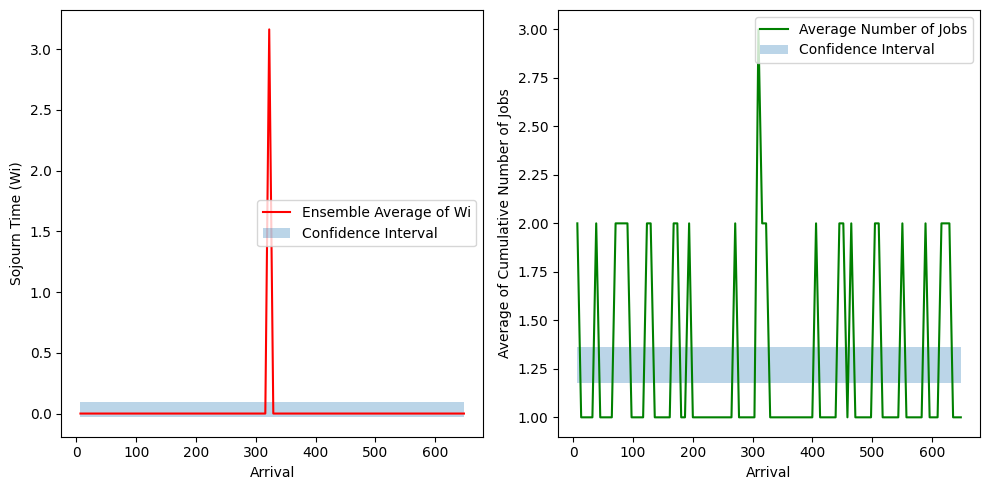

[6.8227326865641515, 13.396135287425034, 19.92494151567788, 26.108627665384915, 32.49910144025712, 38.6396482357953, 45.442237038505226, 51.9528160051137, 58.66554920869695, 65.0141690010906, 71.38417268737895, 77.952826708706, 84.80194889215048, 91.09638670895876, 97.29605326925747, 103.40760698093725, 109.54264620074333, 116.34134307245215, 123.06371135444152, 129.2138964613052, 135.36331161368855, 142.2271392864148, 148.6367940546011, 155.29237937977018, 161.5293900400949, 167.76214103932128, 173.9473959030889, 180.16111675166334, 186.51622677048587, 192.6786403970613, 199.14675248204043, 205.2790021352583, 212.129074343248, 218.52237249661846, 225.09486920918738, 231.696016440382, 238.3090660596351, 244.90718776632866, 251.79358102692677, 258.4597974251373, 264.9162946296627, 271.4523921089222, 277.62848395139224, 283.8086652128251, 290.49653229498693, 296.7684481442402, 302.94112602015076, 309.81456770433584, 316.6159935985413, 323.48208612772953, 329.6819485453655, 335.7997621930

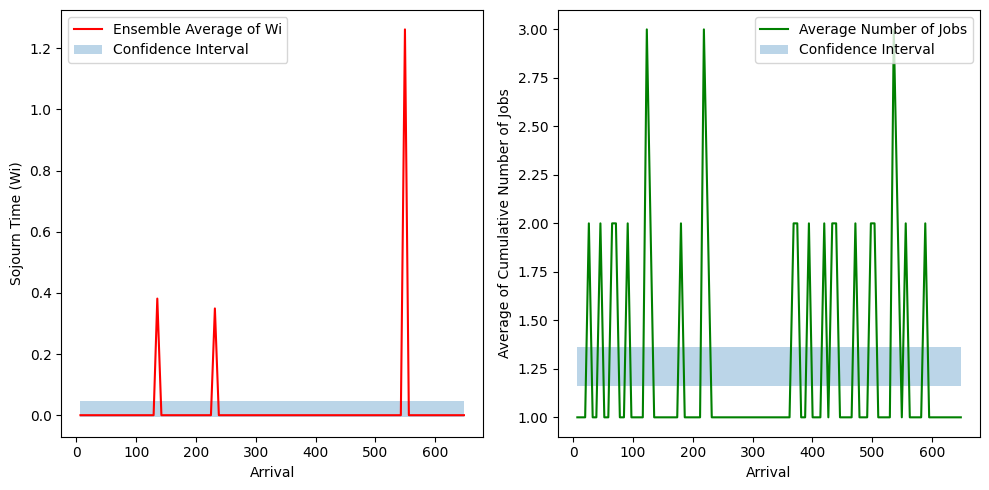

[6.3137641118542325, 12.543229472232618, 19.036633244935523, 25.701429298366726, 32.26738250113593, 38.464547053790724, 44.59343907498001, 51.446311251084474, 57.73778077528978, 64.45152440371822, 70.74735190934143, 77.39961971771349, 83.76647199624361, 90.35315031163047, 97.19056058414024, 104.03346099414446, 110.63082480519104, 116.88684347837692, 123.31253303649034, 129.7896580483888, 136.2375238918048, 142.56178506610053, 149.2540367884721, 155.8376419961182, 162.35045174087668, 169.12725392371672, 175.8182515105119, 182.31871462021482, 189.01851140365054, 195.62908241791428, 201.88097039052664, 208.01185461750853, 214.31275710125692, 220.82920113105092, 227.24526667427605, 233.68283700220653, 240.17175202385414, 246.57171010985255, 253.05411211957565, 259.95143837684964, 266.6735767598783, 273.43289755286315, 279.9166383967767, 286.1897580243265, 292.7345310823158, 299.08041186483337, 305.38789181093614, 311.89759877602285, 318.36332852616715, 325.13800384501076, 331.4191853948504

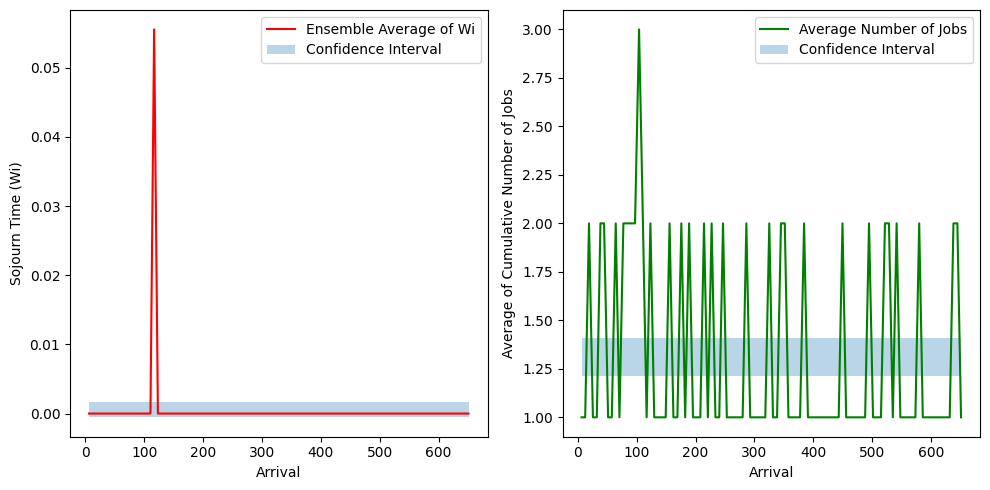

[6.527488783273785, 12.789857104396194, 19.20938807854688, 25.324158686427452, 31.826447482703852, 38.5310407452517, 45.15576521453963, 52.00201550647084, 58.605749442940485, 65.09048614380052, 71.29346570053538, 77.80376307307499, 84.3392789334847, 91.16925537525736, 97.78225128919148, 103.99108050890466, 110.84985586006272, 117.35125049444864, 123.69946916308247, 130.54125851142163, 136.98593135017492, 143.17295267351378, 149.53933251116086, 156.18132356794365, 162.4745713672591, 169.23491337010407, 175.94003656607057, 182.1468217711417, 188.9174955427363, 195.44713951728494, 202.2794608325881, 208.7034553577953, 215.11212363843197, 221.89862337510203, 228.03322353166539, 234.84592100719956, 241.65259207003513, 247.92030490746262, 254.74492973814503, 261.6246263543867, 268.0929914047279, 274.8017763985513, 281.0412369108073, 287.54394687035483, 293.8991743671149, 300.7269650578441, 307.1004194192054, 313.9497558512643, 320.37269518259, 326.49386013226416, 333.21346221664237, 339.8888

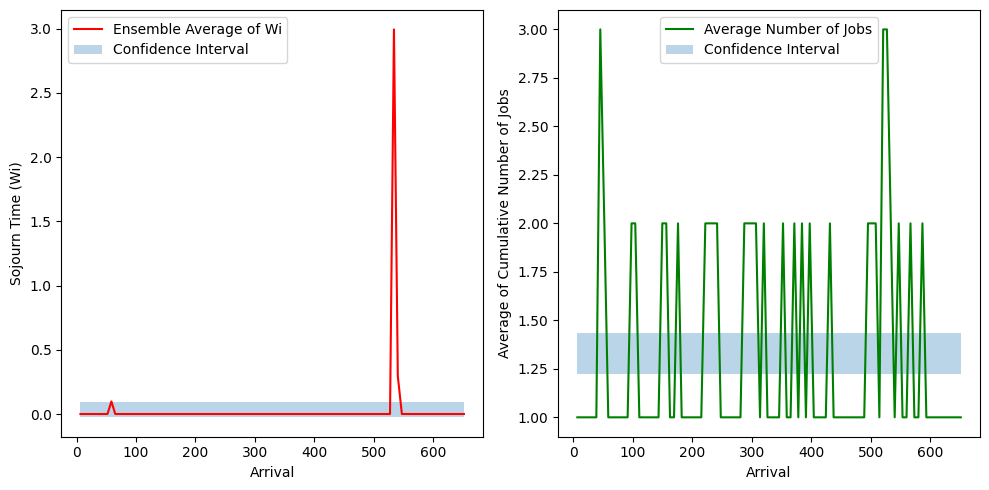

[6.352410638668575, 12.922399062447552, 19.279143661121825, 25.907776112108976, 32.14196063875035, 38.72681386671343, 45.400803154403526, 52.120541187928275, 58.88870818563225, 65.4918765809575, 71.79166898698452, 78.1375719014911, 84.44424021039093, 90.58172541782153, 97.22659274287807, 103.39848690790406, 109.78935488491946, 116.06250904296355, 122.47879655950035, 129.23781248207808, 135.5419330980858, 142.31004018169816, 148.79509955183664, 155.2088510162985, 161.83205241833863, 168.09152296239867, 174.5542952948303, 181.11471550218096, 187.28186716324507, 194.09218568819855, 200.22222363632005, 206.96493324635156, 213.54905681979335, 220.10145038850078, 226.91060776822027, 233.41464711660072, 239.84845198623304, 246.51926797381358, 253.1996969512937, 259.7639361269882, 266.12357838183226, 272.5520451054985, 279.26340764030556, 285.78890673662534, 292.16099661813246, 299.0032675377244, 305.5250182409786, 312.17682218852696, 318.9316246054808, 325.6543041950792, 332.29649167592675, 3

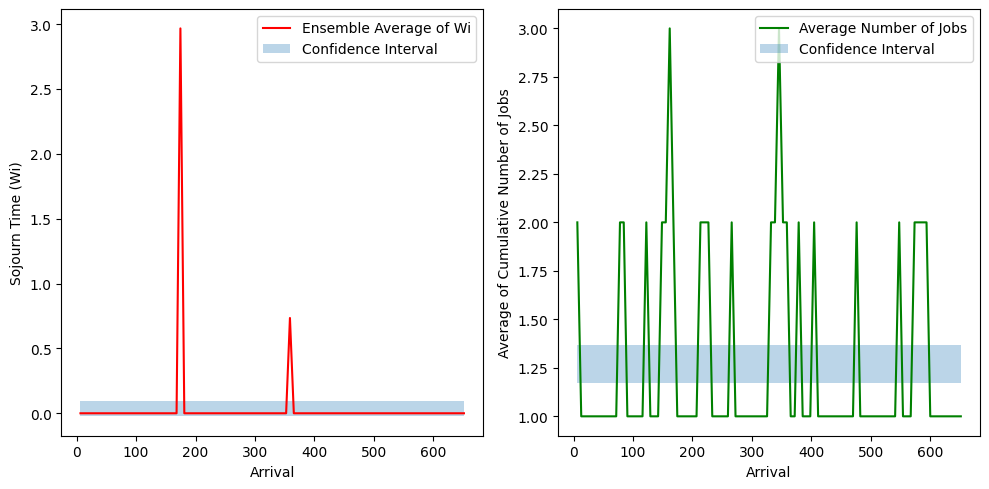

[6.534346070758064, 12.951041932322473, 19.356694863974433, 26.068603880529096, 32.22048891979488, 38.36900847474234, 45.06939910455956, 51.940839721710574, 58.551624358292635, 64.71293575832622, 71.05762506413907, 77.57918771061313, 83.90302024965202, 90.49560909690656, 96.95227006131589, 103.11100278996585, 109.26120820044082, 115.99727465081928, 122.61532519537347, 128.97285950294142, 135.0895599434765, 141.96873350537643, 148.7478816787163, 155.53926609142997, 162.31549722973023, 168.5232436060452, 175.15307086681756, 181.9954787456418, 188.63332714823656, 195.08084940845737, 201.787000996394, 208.37549397201713, 214.5138957804168, 220.76210267536803, 227.11767383002166, 233.69335870486293, 240.42710038512263, 246.97285748492996, 253.31731742726302, 260.01243010215353, 266.689380620435, 273.2970179581524, 279.42974723623803, 286.20626343594745, 292.98887596596114, 299.4695302994402, 306.2781245722253, 312.5210456777211, 318.86478230315817, 325.6626511015721, 332.0956515936719, 338.

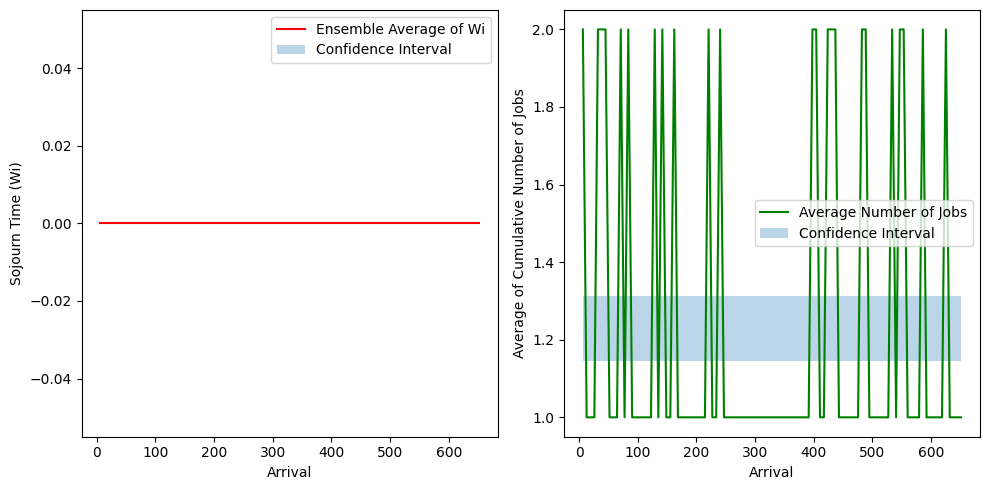

[6.3309696844159316, 13.132902682969037, 19.248764712114507, 25.926865442266102, 32.220861012167504, 39.072851749880314, 45.73168167151889, 52.260409360911225, 58.51160679638019, 64.86530761185615, 71.17006891766806, 77.4436889587012, 84.31605097419076, 90.44780215342924, 96.75980585501539, 103.58917966965316, 110.418715395228, 117.25857628788975, 123.53286674334748, 130.39548986914744, 136.73233396263345, 142.85617496569935, 148.96733280643772, 155.30470372925222, 161.68781888065092, 167.83060739548836, 174.49320178912868, 181.1470325651225, 187.38347513489427, 194.26426079950846, 200.62670149587126, 207.008337953596, 213.5591116972489, 219.80205734725033, 226.52439537442945, 233.37823162864848, 239.69597331970175, 246.36768307130484, 252.88923843169005, 259.3881847983436, 266.0070489566349, 272.57458338298517, 279.2386756907248, 285.7399595043009, 292.1936268874589, 298.6711384442713, 305.4707660162952, 312.225851126514, 318.7935745766251, 325.39370976997736, 331.63810663978427, 338.

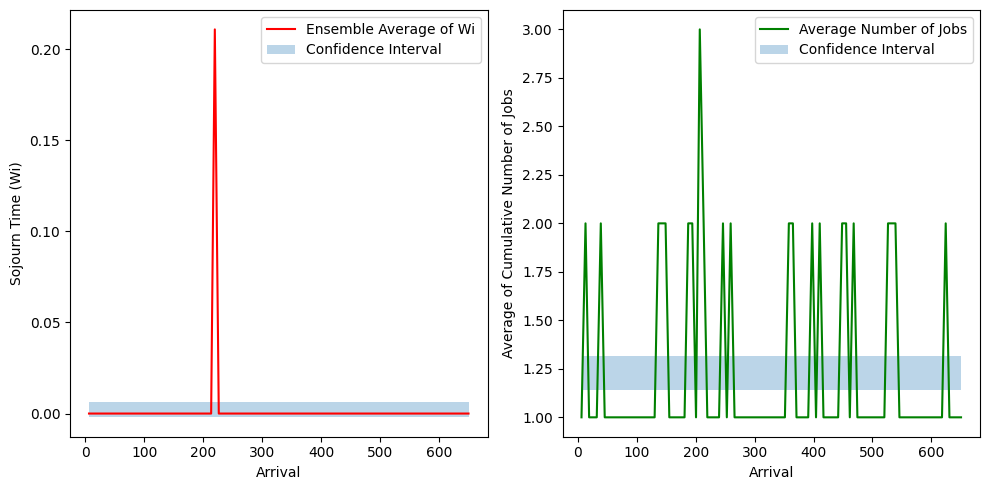

[6.339590046873824, 12.626394801975373, 18.91509032991765, 25.040047148008018, 31.60728602083923, 38.01209895386847, 44.28489745056885, 50.64214829221336, 57.37055110498942, 63.91693585931558, 70.04481117892902, 76.51767701801364, 83.1042952740504, 89.92623746766867, 96.81285511452303, 103.242550352241, 109.40695887201596, 115.63347327546413, 122.46503294794995, 129.1402894050885, 135.43065114702034, 141.9698086023125, 148.39031852746797, 154.52740856078077, 160.69368852619624, 167.22708880994327, 173.56302312854126, 179.83307156411507, 186.29029122232572, 192.75986770731757, 199.02483427656392, 205.87309789500878, 212.4612021782714, 218.6410881911361, 224.92943082782088, 231.3067290718451, 237.91188947740622, 244.24235503076798, 250.7045098039669, 256.8719309052645, 263.6483535519227, 269.98659210081803, 276.76419070666736, 282.9519104401009, 289.39701952791273, 295.87857572882945, 302.75362157440526, 309.6233699492529, 316.4307075327688, 322.9150012406949, 329.1940194632703, 335.5270

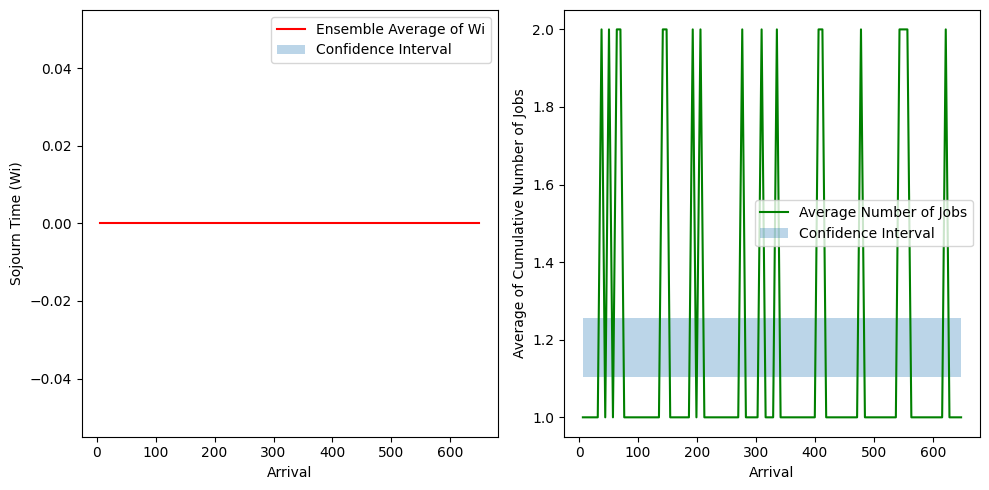

[6.2191112483332365, 12.466849698265658, 18.93788345352448, 25.098653985564688, 31.376967338994486, 37.61350098798643, 44.37134364296259, 51.13741703624515, 57.37098882511811, 63.995914049534875, 70.87365934820879, 77.4680126731314, 84.15900349339488, 90.90819608371588, 97.02405659444919, 103.47210345737858, 110.16379726071108, 116.87139062096057, 123.50607689817869, 130.02809615023696, 136.90184065984562, 143.24950252332903, 149.89146688473886, 156.4637278961044, 162.9488278644796, 169.22775271896467, 176.0682090612214, 182.36196351407446, 189.18593287678323, 195.6949609850072, 202.35542115839667, 209.0329794384552, 215.73866175330033, 221.88803383463835, 228.29417423687056, 234.48509129349145, 240.69735545090367, 247.57148806265667, 254.28044710959392, 260.60378961721534, 267.0983205300627, 273.2781878833137, 279.4888709482477, 285.6156470872697, 292.000269500778, 298.294504849309, 304.6094729448015, 311.0516791407416, 317.3930561743678, 324.0441831194451, 330.716107219113, 337.34365

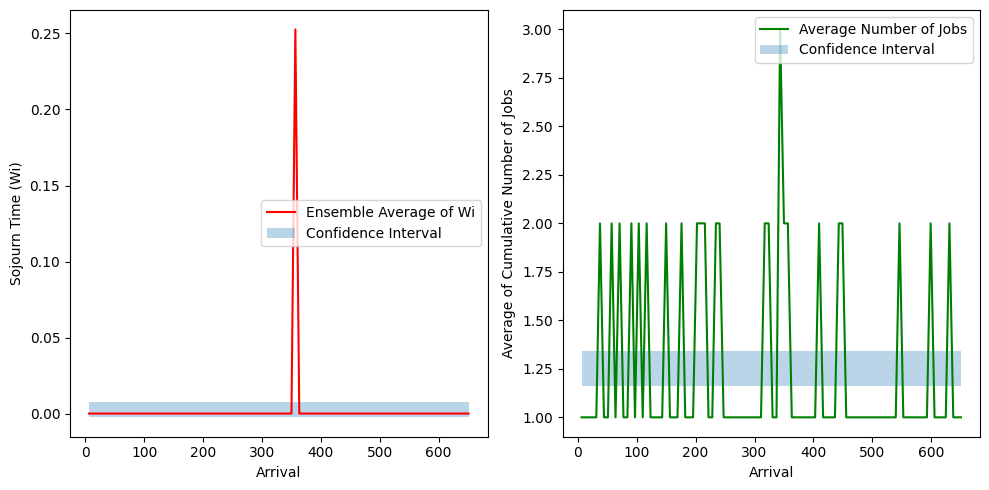

[6.121247382551116, 12.38119453040456, 18.583414611567324, 25.39716503630703, 32.13089589760566, 38.4380892022753, 44.89302204290091, 51.730984771847176, 58.56937352485911, 65.31788013195087, 71.8394988382025, 77.95224806736931, 84.70744750540105, 90.9420619510868, 97.82982654219151, 104.00822890116756, 110.40826280092132, 116.53845806160918, 123.130137365252, 129.9356935144102, 136.74067622505274, 142.98590467357013, 149.21452833375142, 155.5590797751872, 162.24479054953417, 168.91168515774265, 175.30983803110638, 181.55057756786712, 187.82693041142042, 194.04398002546952, 200.9399605085589, 207.36950465297053, 213.52075758239596, 219.76780968435654, 226.36187070612226, 232.60072501724204, 239.01391132594313, 245.90801400946427, 252.16509393009716, 258.36244505651365, 265.10753990472057, 271.26898987231874, 277.9872046520797, 284.75026989872856, 291.026835063801, 297.59041355445424, 304.4573369765776, 311.1399552394631, 317.795113683641, 324.16004163262716, 330.44605165711755, 336.742

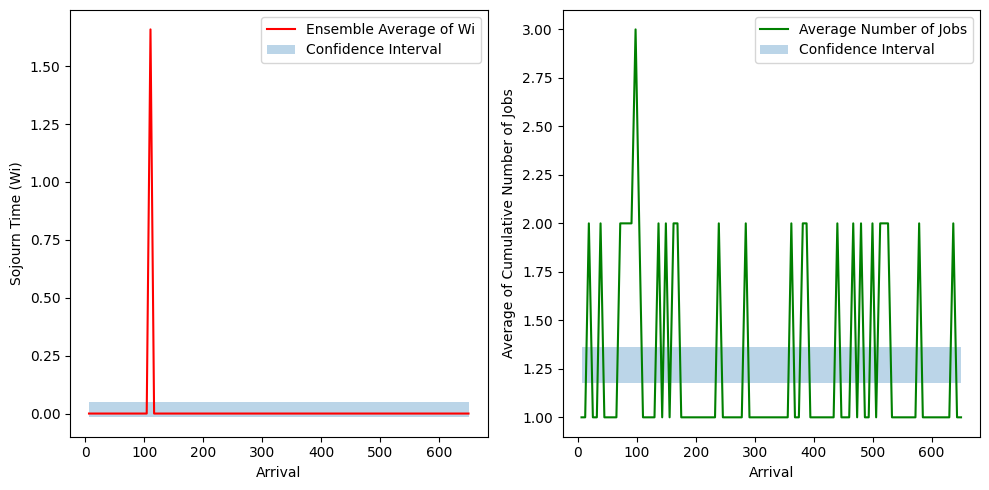

Warmup period for p = 0.6 and 10 replications: [49, 84, 17, 81, 26, 1, 33, 1, 54, 16]
[6.861333265357485, 13.458953616644827, 19.88651505765598, 26.48394660764662, 33.29259281349661, 40.05367624422536, 46.23127403657065, 52.534827316142476, 58.66596861150017, 64.81881694594242, 71.65067638782384, 78.34691232611146, 84.90926770002667, 91.43000397878538, 98.27768941567408, 104.52376980458489, 111.34524866884884, 118.234432342854, 124.36565931978586, 130.9623786181042, 137.67789637703382, 144.22102544152776, 150.94329300579844, 157.82144486527974, 163.9543718447513, 170.377993328821, 177.15895833569988, 184.04899392848108, 190.72413244231714, 196.8471577789846, 203.45436899933893, 210.30439050494417, 216.61786016830882, 223.3888352568477, 230.1087172739964, 236.72113724696376, 242.96297278644877, 249.66510921132328, 256.33742836510817, 262.898515790063, 269.30929425145115, 276.14047681307227, 282.258401645472, 289.084659445522, 295.9719220074739, 302.7981248581716, 309.43828189833215, 316

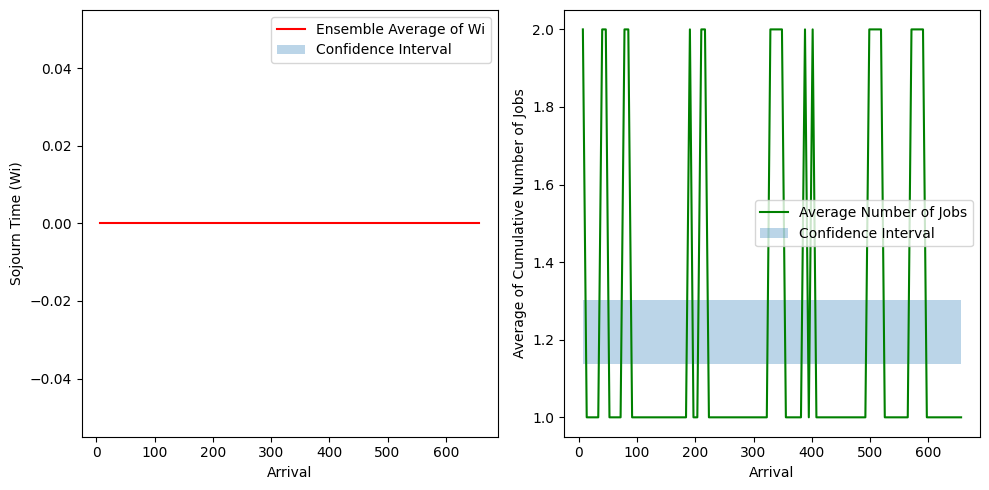

[6.454985685963796, 12.807765867040235, 19.404622699042378, 26.013836206453647, 32.55940309925275, 38.79960831491876, 45.43463556130136, 51.58510379271791, 57.7019926615814, 64.04750630842611, 70.66567264910455, 77.51534255052293, 84.22897727739618, 90.95832025331958, 97.28820441356865, 103.99518769281313, 110.11871241071564, 116.47590306774637, 123.1366968246747, 129.45938383938875, 136.16301794223932, 142.40758495966773, 148.936406458393, 155.52495516943708, 161.9913660873971, 168.67400344931517, 174.8416704845556, 181.5049110880576, 188.15577474300594, 194.4551291249026, 201.26591223483115, 207.61553558873953, 214.06471018661227, 220.38010868886585, 227.26811577084112, 233.9165804276123, 240.61719473723227, 247.4638750038664, 254.04066611204897, 260.8955247839859, 267.3958536290557, 274.0956270023212, 280.3541021304414, 286.8002982310641, 292.92077839480874, 299.70076537393373, 306.0971147882346, 312.50616162210235, 318.81827837185995, 325.29780148643874, 331.7410666163798, 338.2264

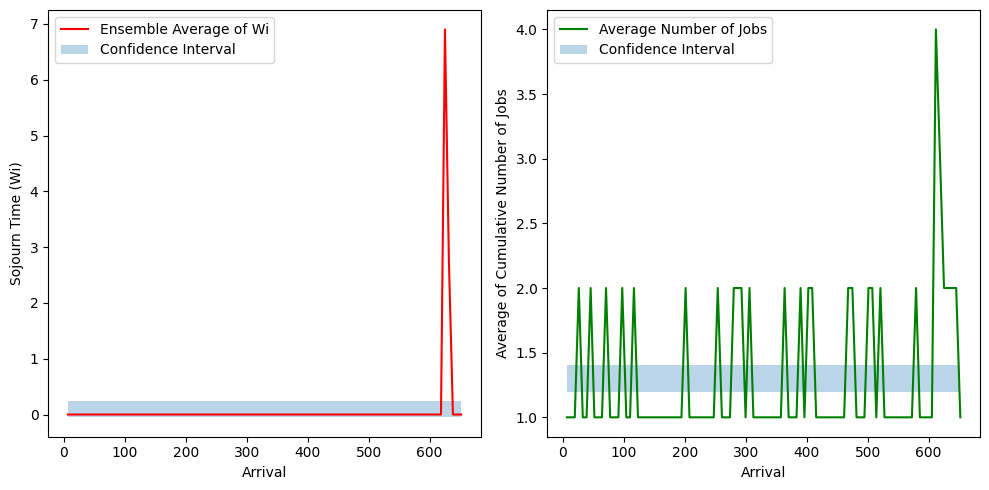

[6.712434783730601, 12.885947392151976, 19.10230538703526, 25.23051681413864, 31.506073159339778, 37.91256418037422, 44.15017532483197, 50.72973507060494, 57.43496583782665, 63.564696062442465, 69.76475356301763, 76.58806210802379, 83.07342087608228, 89.39502119752925, 95.89250490319151, 102.60035563011569, 109.08040117757736, 115.62243961655663, 122.23672690873217, 129.04906584078387, 135.31135240982601, 141.95991390084407, 148.33558096983015, 155.02737054728394, 161.64786734184682, 168.30524320324625, 174.66036513948808, 181.50299579751947, 188.35518329637222, 194.58896050177034, 200.76605265162624, 207.43389896065526, 213.97564399789658, 220.5355931434404, 227.09866923434717, 233.9594834716086, 240.5456884370876, 247.2102356882322, 253.7263460478142, 260.33084619107336, 266.95315347156986, 273.2793988618168, 279.5757467245939, 286.1650255499842, 292.5324867195632, 299.3038478269219, 305.5998249417024, 312.1525155254066, 318.63277312452783, 324.83730290218824, 331.0247172330563, 337.

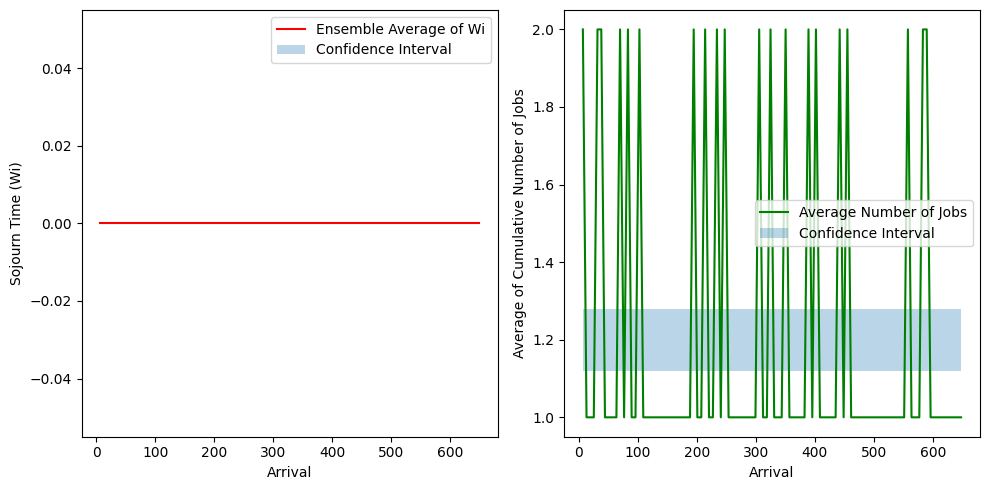

[6.834732078947896, 13.532544573107742, 20.030069307637024, 26.68584157732495, 33.27744006278465, 39.74667280022736, 46.31948453949448, 52.606906397947355, 58.7621144936531, 65.66085951889131, 72.35298315419564, 79.21956666705252, 85.77122573927154, 92.4421610620346, 99.27132481970591, 105.56581920175059, 111.96765038572146, 118.5499763424549, 124.83799258746343, 130.99409962686343, 137.5775262169845, 144.37047945479412, 151.23692935822174, 157.410111340491, 164.11468586885354, 170.3728127622553, 176.8775624314796, 183.24572089193168, 190.07819657845508, 196.77320313109922, 203.40329397740157, 209.81301112250256, 216.26517880923322, 222.78793405630833, 228.90042396743146, 235.47115151382206, 242.00319944023036, 248.7486461869817, 255.18308274305372, 261.8704562710088, 268.0939856537698, 274.8313913839261, 281.43993114199327, 287.9689426589556, 294.63968883764295, 301.058783456663, 307.4345267492217, 314.25539960492483, 320.71704401348677, 327.5922151766083, 334.4202264853447, 341.29794

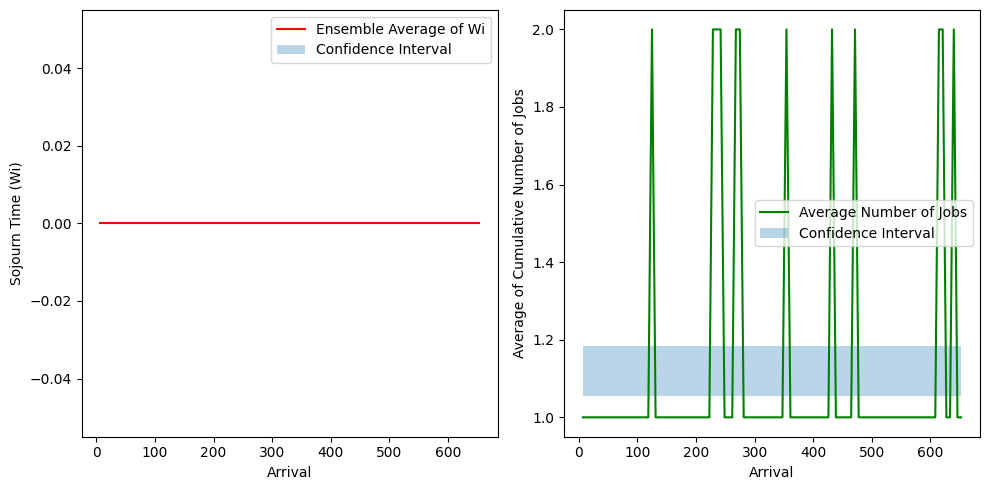

[6.502755608608706, 12.655351561317705, 18.98435723958663, 25.518839063706952, 31.672029814185397, 38.22120605331842, 44.85384441143811, 51.014787363467214, 57.75278985872001, 64.55632890401498, 71.23702244066111, 77.95512613667613, 84.27023250434195, 91.16257746491482, 97.88782991266379, 104.31853611514944, 110.62743587561683, 117.37214332278181, 123.77234436040624, 130.21540587883618, 136.3917376388426, 143.25024165000934, 149.6743653075788, 156.2807966095436, 162.69948005565666, 169.43334786235474, 175.9823693998254, 182.26668173065596, 188.50366963906677, 195.1983257439202, 201.9142926714584, 208.41216202853963, 215.0552533930756, 221.706141413081, 228.393876123407, 235.29366181547869, 241.4870165945625, 248.0257293563907, 254.2893736956579, 260.7110979842831, 267.5902689110165, 273.95932423921397, 280.31755939802224, 286.74161915104264, 293.3704903021978, 299.97663373038284, 306.55921955987935, 312.87490781284356, 319.45555883449356, 326.0941259039275, 332.9880534321897, 339.11896

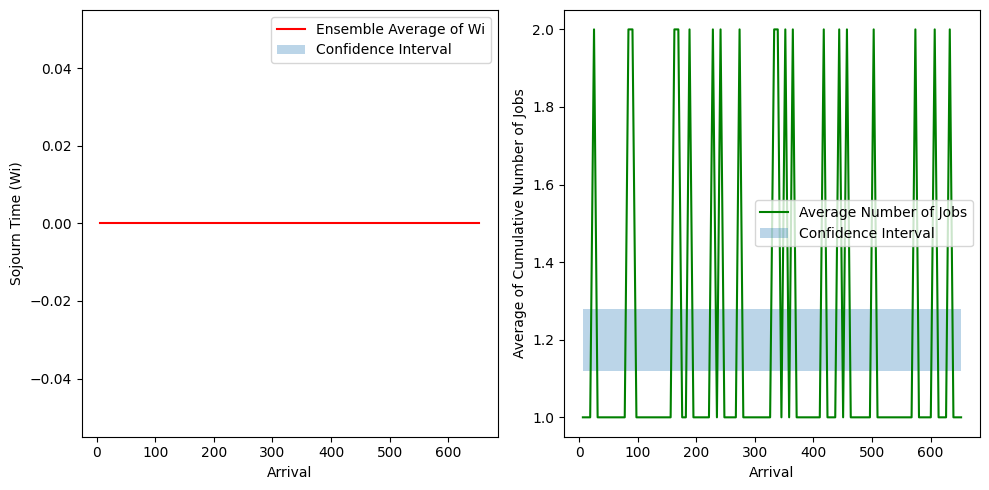

[6.704427449083072, 13.29232691376181, 19.865789416379798, 26.45972529673614, 32.76274524649064, 39.45920325857887, 45.837732181672536, 52.65944443135719, 59.15836669244414, 65.80367378219364, 72.01492914895255, 78.62822008011021, 85.49191450097244, 91.63060695049087, 97.77568960994137, 104.38380921212128, 110.57704752262, 116.7102891986009, 123.04997423817917, 129.3997025428662, 136.08298795140874, 142.6013613948887, 149.3603743603118, 156.24095407034906, 163.12848338789132, 169.86874171210164, 176.55760891371563, 183.40554882334692, 189.52281470747204, 195.90499032864673, 202.16626200634525, 208.80396237379847, 215.6763155652827, 222.40982787931725, 228.61318153756395, 235.10958443103362, 241.25134511201168, 247.77330081386106, 254.36745383497055, 260.5134416343026, 267.38495333542346, 274.2443954019582, 280.6724021616679, 287.40210348586464, 293.8134993133962, 300.01636149047704, 306.52871038385473, 312.7383434938766, 319.1157471604541, 325.74265987104747, 331.8887933149451, 338.499

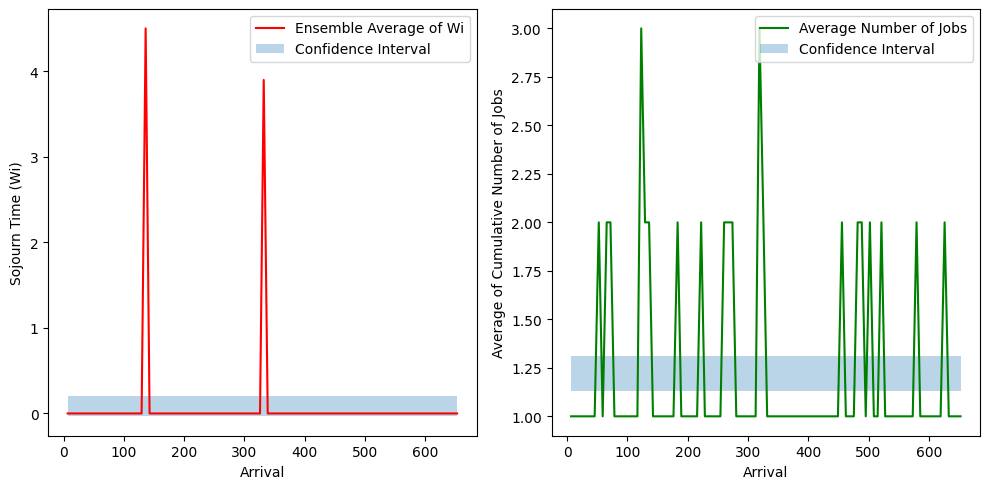

[6.516021888430922, 13.308571501391103, 19.975791144512833, 26.30929801422836, 32.849757179454166, 39.337039417810004, 45.81750797734472, 52.54506127835033, 58.89811781381774, 65.01097723224572, 71.54564158303364, 78.14107824593937, 84.83127298820047, 91.02464629626442, 97.30336226143957, 103.9972029466667, 110.69329936976675, 117.23829131547905, 123.9607255578043, 130.09708148568535, 136.73115523905167, 143.13294516620996, 149.81033394250386, 156.3793849422839, 162.9919656895913, 169.61254083596344, 176.27072165689412, 183.02914757194475, 189.61651037041315, 196.02952962083913, 202.16621097970338, 208.7432900746931, 214.93211580039295, 221.31299608287273, 227.48110260053065, 234.3203063342277, 240.5127638105822, 247.02391583750136, 253.20117623063632, 259.37945515521153, 266.15530539239586, 272.5265997911922, 279.0599348043314, 285.73150787579397, 292.16741088910646, 298.58711528898414, 304.85746726105157, 311.6016356900432, 318.2936722225388, 324.8144430726037, 331.50294185758395, 33

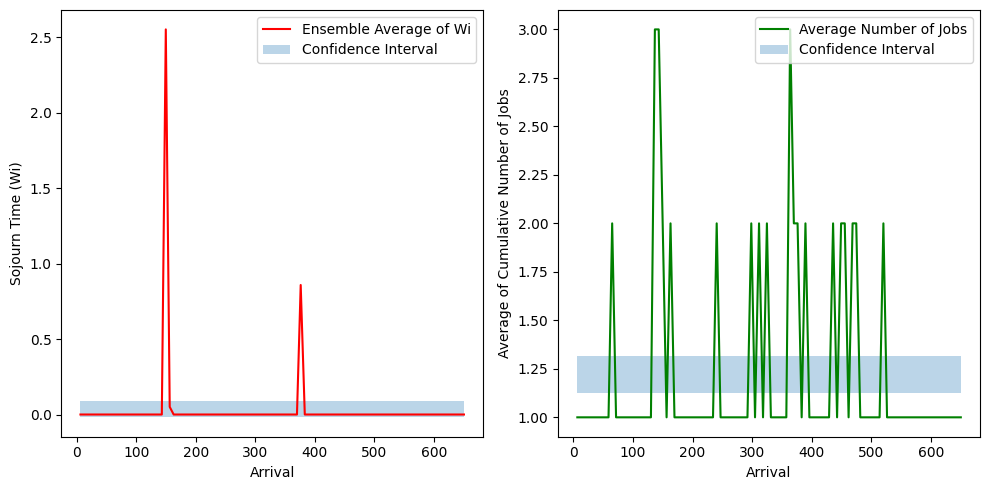

[6.415569171454912, 12.999130001397495, 19.889408488838747, 26.12230238521272, 32.535478832721665, 38.659140861184206, 44.82193629802818, 51.50908063644193, 57.77699785462504, 64.18149924337762, 70.31595256547602, 76.48333059659177, 83.16658849051713, 89.85394354429549, 96.04548257812179, 102.84169649571548, 109.04885617360037, 115.4678369755602, 121.64011605283805, 128.40943943215674, 134.56950536894297, 140.77450682679844, 147.1464582711638, 153.3182526739479, 159.89878914748417, 166.2016723078563, 172.86530252032216, 179.18365673309398, 185.44309288718614, 191.9437457345905, 198.47479196357685, 205.11791220684216, 211.45871678470468, 217.6118542987539, 224.45486590223942, 230.77535121021788, 237.20717172151853, 244.0328321210773, 250.56974794273142, 257.1071856664277, 263.66652619192774, 270.3193209839481, 276.5564469975228, 283.36173648648173, 290.12148595959735, 296.8781843812675, 303.6187808059621, 310.38145138686025, 317.0079886362043, 323.5726523725728, 329.94757429257396, 336.

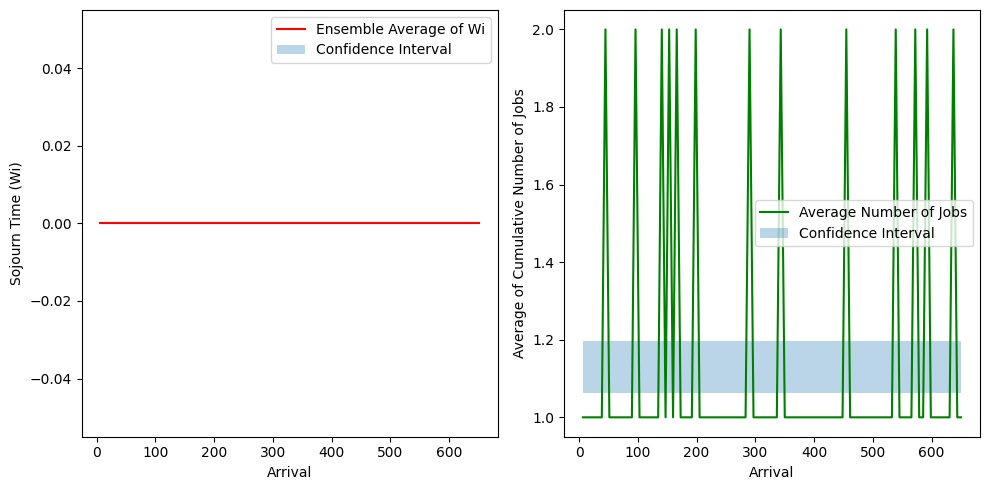

[6.829719552042685, 13.056341774412132, 19.33430902575076, 26.18789209082952, 33.06617510297742, 39.751461419104345, 45.98124233027916, 52.46585729046562, 59.28420272558498, 66.1573922955173, 72.8005487542344, 79.40173913009862, 86.27359886581029, 92.53346391694643, 99.28472024713085, 105.87242838458327, 112.37588232516889, 119.03960567065423, 125.43322509674884, 132.25071645897518, 138.92376226544616, 145.37881589972037, 151.54294731010535, 158.1326750187613, 164.4398924985637, 170.79540517502872, 177.15789580075887, 183.89343607296743, 190.5633059884225, 197.17522953358758, 203.38623244928908, 210.05595364397513, 216.77745647568014, 222.88988397843804, 229.6098468610817, 236.44996464722703, 243.00705773816728, 249.71865068725162, 256.02237956987045, 262.7911012583983, 269.64120095839473, 276.0755348403808, 282.93449983248445, 289.1977010341696, 295.3516252226673, 301.9660653351932, 308.4204705009598, 314.7863894753414, 321.4647928189713, 327.9670351938583, 334.0872117013039, 340.2597

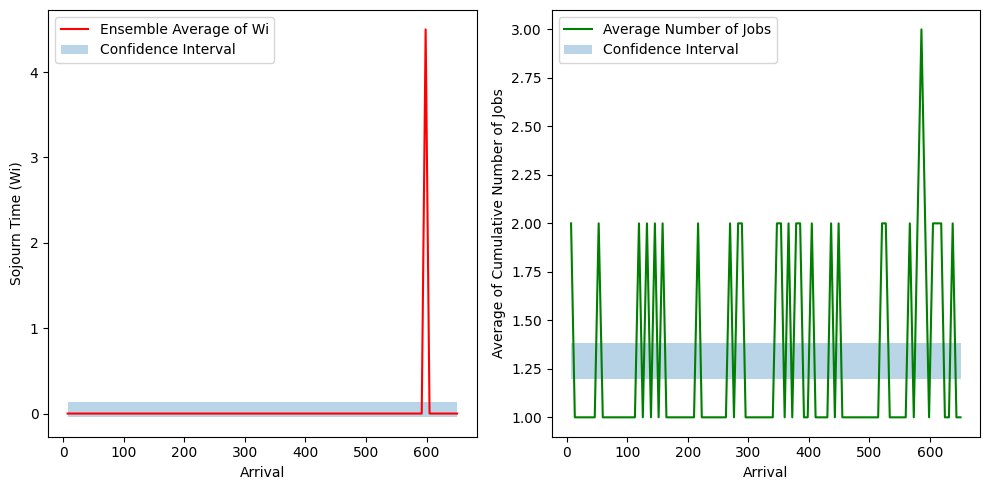

[6.503609426407629, 13.401462504381177, 19.88514358766358, 26.71622931616932, 33.57565413520433, 40.19701366819827, 46.85672652681271, 53.35340726538849, 60.14079557470437, 66.4969324293415, 73.1234378829781, 79.26275881311012, 85.5021999037603, 91.78368094150036, 98.59647461481578, 104.94675263233299, 111.6676588247546, 118.25350322297412, 125.09247139307907, 131.75433955147972, 138.5815846242512, 145.37353030775992, 152.08291653381735, 158.295494878097, 164.44200170923006, 170.55899597385155, 176.71661488658054, 182.9611026130144, 189.3763941994273, 195.99489287352444, 202.55648440795417, 208.67324328984336, 214.7865304285059, 221.45076489797682, 227.6581238957668, 234.1493174823237, 241.0023154977116, 247.16445620883098, 253.9621076440352, 260.31037567185507, 267.05233857719264, 273.9186244327226, 280.69667678933297, 287.36064823424704, 293.5119861078576, 300.0387187412172, 306.8460433488914, 313.0615144787856, 319.3308502576191, 325.9040318846816, 332.79328241543965, 339.5707955645

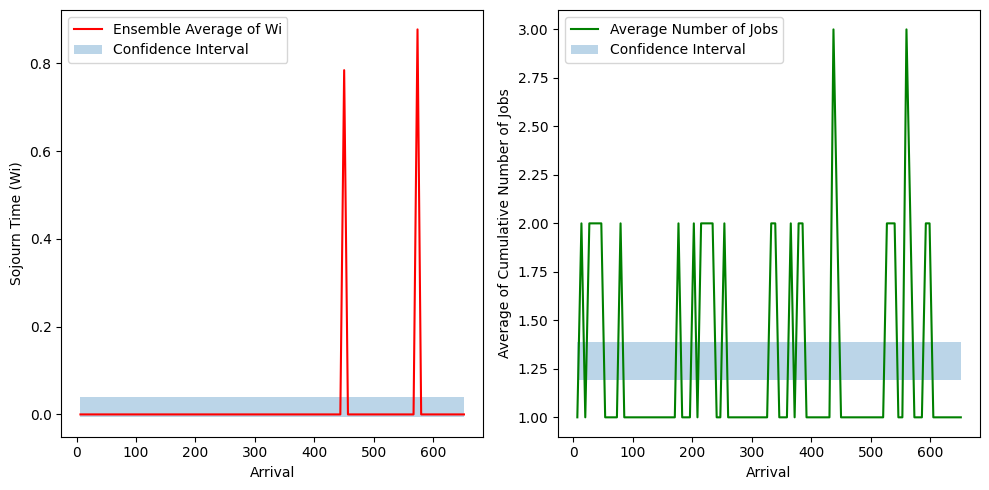

[6.322861509059357, 12.455386000519919, 19.089128228799552, 25.310462490264136, 32.14284613816209, 38.4687115412301, 44.686933209443055, 50.84514155462398, 57.353249827406835, 63.7446241344483, 70.53614145199116, 76.7833064077108, 83.35246340002877, 89.53352937237574, 96.4147528889993, 102.62877293203758, 108.83214590195476, 115.06526594780065, 121.57123381807725, 128.3420515300664, 134.7384325257059, 141.35002829991814, 147.74731584152403, 153.9644116708377, 160.1386649143135, 166.67401018981872, 173.15086376366574, 179.83154580708913, 186.12287654335674, 192.94560434113225, 199.66498174663872, 206.25681864066448, 212.68065358053502, 219.22101391372615, 225.6184007172347, 231.8493498852862, 238.58312809260508, 245.03278865916357, 251.91717176624988, 258.03929520949947, 264.59555010158755, 271.00057758869195, 277.89348432258726, 284.16553977052854, 290.310947896008, 296.6167112998824, 303.3981337434716, 309.638127888077, 316.13657833748624, 322.3943668022074, 328.7333191995101, 335.237

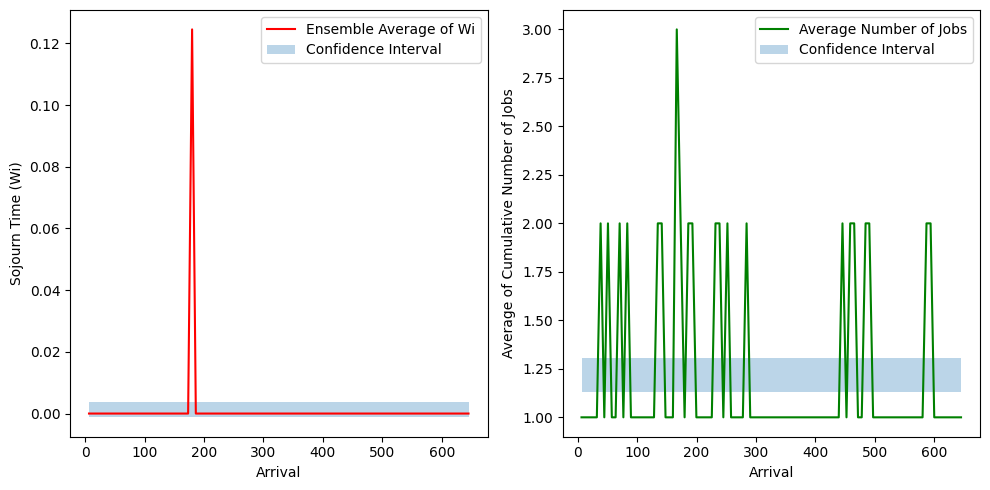

[6.554677277220375, 12.712312177670157, 19.011383534604114, 25.817126255879188, 32.30058983171709, 39.00377540655627, 45.768995168942695, 52.49251255815415, 59.30817967296229, 65.50881087764833, 72.0108593188286, 78.71359958374646, 85.59319388199219, 91.88931397801673, 98.46767474295518, 104.75912004585155, 111.3537674784981, 118.0961906984659, 124.46203791818387, 131.13485335793595, 137.3174251914607, 143.69025579539894, 150.3937321672986, 156.71908131046257, 162.97144069999933, 169.39026499550687, 175.8364063199258, 182.2804360513132, 188.6104725657372, 195.04383994885922, 201.31629072115132, 207.43942140235225, 214.28229428976175, 220.63363610155218, 226.92289702698682, 233.2941173198855, 239.919656158513, 246.10062118142406, 252.7275165143127, 258.8852723600002, 265.0895447041916, 271.32156210870227, 278.1044657687049, 284.49849976796855, 291.2885789445396, 297.96620621686577, 304.86535167871875, 311.2538958470884, 318.071901635901, 324.93975440294867, 331.4906071637717, 338.153076

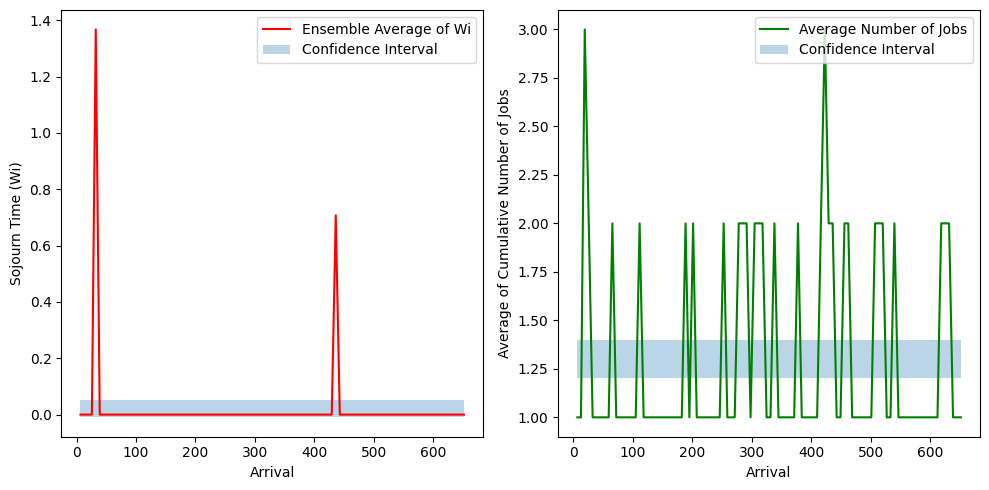

[6.610176680833891, 13.432371087799421, 19.76557382737802, 26.605818207709582, 32.74031555128695, 38.89983926391324, 45.780077231702165, 52.36618262526586, 58.6524324986377, 64.8341444950344, 71.54614350953182, 78.1657303709058, 84.3045188666027, 90.88813746618551, 97.37653108812664, 103.71920177051872, 110.1912374512171, 116.9739314542155, 123.58191312932782, 129.75136480644778, 136.1061814904235, 142.37210076669027, 149.02919993153336, 155.27978323675788, 161.47804481770265, 167.86463811618776, 174.36446975600774, 180.48567217444355, 187.0567871891438, 193.6984996326077, 200.53945996462593, 206.73033611254857, 212.96986672431044, 219.80008217388686, 225.9538066923899, 232.69926037926643, 239.26496768657645, 245.54106728500622, 252.361267966637, 258.69507477219787, 264.9198182357954, 271.5858783624693, 277.99482161575514, 284.432236875482, 291.1861330983854, 297.711929484947, 304.60218593451276, 310.8856172297131, 317.3431616388524, 323.5117409565984, 330.31795438844665, 336.923260709

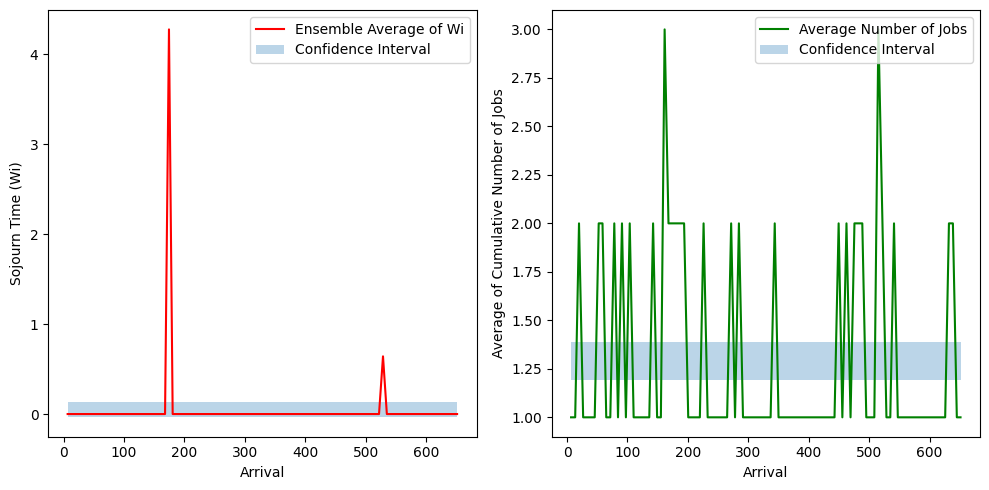

[6.57607784714738, 13.303214968488678, 19.5482489819078, 25.864948313356486, 32.030243993158614, 38.48312361684807, 44.993332120693374, 51.48307738452211, 57.80309442536339, 64.47922764394394, 71.21256975802923, 77.49646865831937, 83.90351650043765, 90.28352265806761, 96.84737586924173, 103.2936414117928, 109.54725140961474, 115.71046508482164, 122.22248945564061, 128.3989829962636, 134.70978302941913, 141.13403944700363, 147.76602661389606, 154.2053883817114, 160.65696833301214, 166.89303495332518, 173.16638288901683, 179.62622104863206, 185.8453512187045, 192.67147081011643, 199.12434565295396, 205.62636870506412, 211.84753049438788, 218.30809975301997, 225.16145796640336, 231.4955971271531, 238.19318385075348, 244.6909403399505, 251.48295866283746, 257.8813911137194, 264.0299482201312, 270.8284969788558, 277.1476088967954, 283.81010877319034, 290.48686927489763, 296.8501285438127, 303.0646019610526, 309.87293615860216, 316.471248341446, 323.26353361307906, 329.87853222189085, 336.18

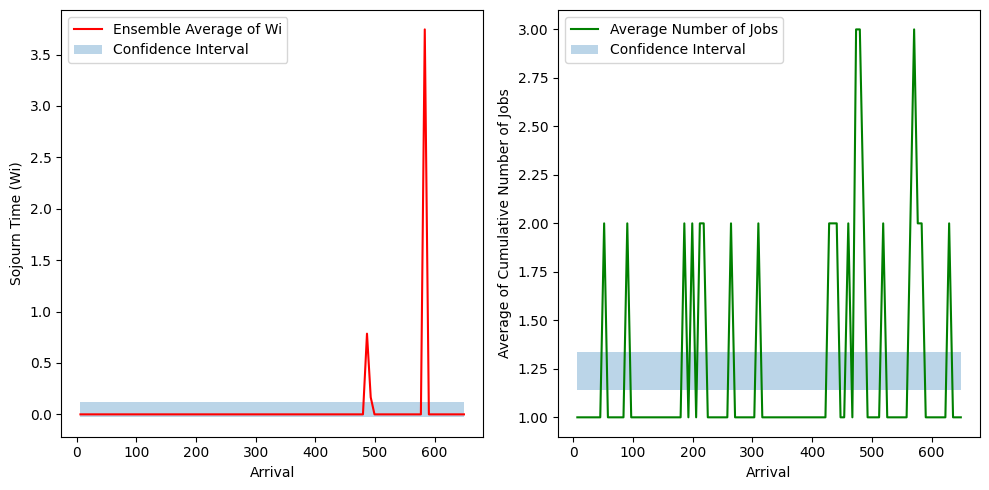

[6.72104982997558, 13.318129598227369, 19.596516104616065, 26.243510424790674, 32.696256984345894, 39.145392612432104, 45.309468416186036, 51.50798093674619, 58.372402607207576, 64.99462255158106, 71.66835810189328, 78.3133294747706, 84.81484232049144, 91.2671228682779, 97.84256263478127, 104.12469137505192, 110.4024418208486, 116.7811301162509, 123.08693694819266, 129.25995144083677, 135.53720621377792, 142.2135947741835, 148.832499447867, 155.1935223698327, 161.80522118026505, 168.44427421831804, 175.30874673851983, 181.92281654838453, 188.16453392297626, 194.4820514226892, 201.0442868752457, 207.42795795713198, 213.53817494195977, 219.84869496229828, 226.17047728679864, 232.31844488893157, 238.69834248919537, 244.92002883414943, 251.46929105292384, 257.98891293392546, 264.55400629237926, 270.68476280374136, 277.16797623405586, 284.0439951830971, 290.78578590424974, 297.1056992385276, 303.90199359881103, 310.4667419798608, 317.0017460962492, 323.3052498249409, 329.7239843012059, 336.

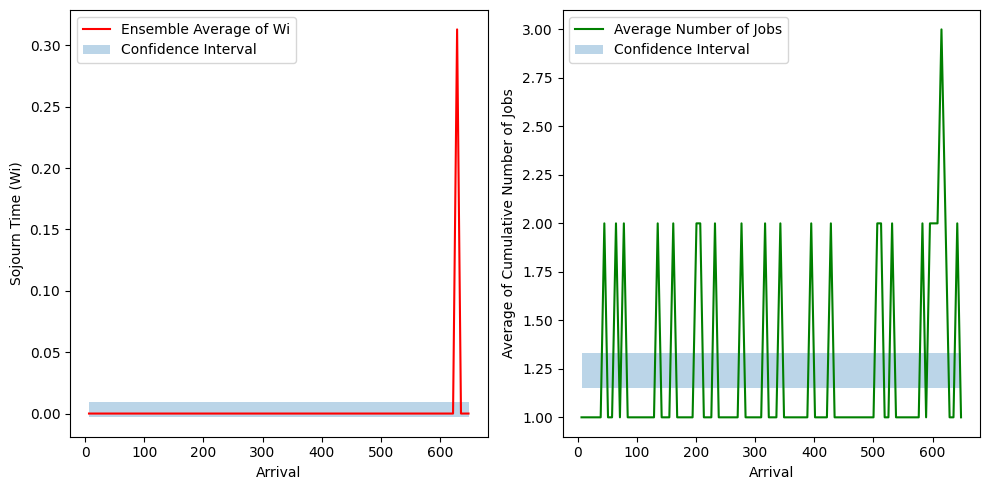

[6.362700966832162, 12.47381044298059, 18.695651105849, 24.813196967864645, 31.054037774244996, 37.881470666582246, 44.49932716243407, 50.8519262066926, 57.35061196819581, 63.94233296032071, 70.45241580241658, 76.57796200252932, 83.41549672937904, 89.73597752900898, 96.10468476699383, 102.41857295699398, 109.06887484952065, 115.94354404018928, 122.63448108709171, 129.23344207313733, 135.68699658850667, 142.4993840872822, 149.1394482070003, 155.25910373155256, 161.43907561036556, 168.12312730722982, 174.23870923602274, 180.41562019800938, 186.97149707645426, 193.48725702159575, 200.02381527387809, 206.63710446226887, 212.84628928638054, 219.14564521200575, 225.45579084791407, 231.8006856804672, 237.95129657956582, 244.47867350591162, 251.0329490163199, 257.30405133652937, 264.0680082456897, 270.80616537700314, 277.32959699291393, 283.92905129083306, 290.4312292390899, 296.79719032063593, 303.00121931136937, 309.4742527172007, 316.02853161861805, 322.9056482001085, 329.50860578383663, 33

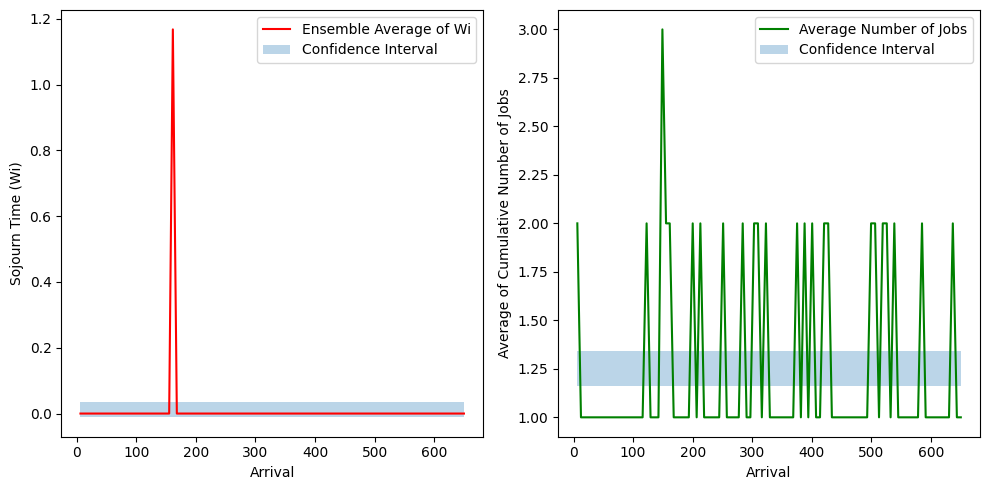

[6.789333839509789, 13.024447319023153, 19.542346903218945, 25.712395355845615, 32.02947615570219, 38.41759082140479, 44.98337735721687, 51.35960763743172, 57.8380877455136, 64.53278008440634, 70.73153994037156, 77.23211063667614, 83.55713224608584, 89.94575615919358, 96.50568242817502, 103.07860669110306, 109.77841106834906, 116.2960303221442, 122.72364872403993, 129.16071423400328, 135.29937243867545, 141.97068143570866, 148.50694304576913, 155.0686541300945, 161.3882638644115, 168.0484409319576, 174.8052408457697, 181.62418197156578, 188.17317977729303, 194.91933296664035, 201.48363469891603, 208.05695944285844, 214.92524752149765, 221.21659801555865, 227.71469574340472, 234.54127307425478, 240.8916715940497, 247.22682659448554, 253.57880327161882, 259.9089635963127, 266.60362562426405, 273.07213919887204, 279.83467145307145, 286.12061841910594, 293.01029175996456, 299.5491345845175, 305.92008548760924, 312.68011050063296, 319.3139766955619, 325.63977412991267, 332.2181629251353, 33

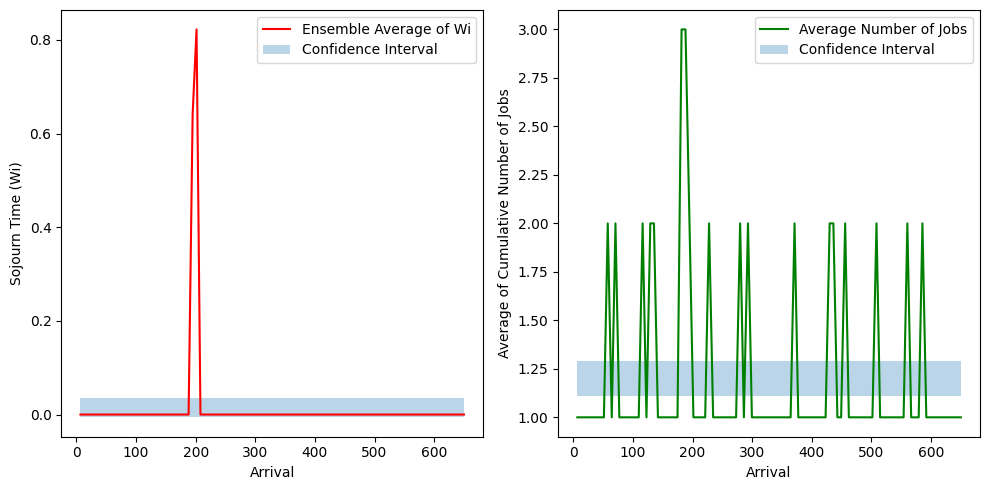

[6.11490495694717, 12.510368209103124, 19.20063796317428, 25.95800081373128, 32.69122329087421, 38.80243339048779, 45.65069846459266, 52.2106999622379, 58.80820287174041, 65.62050245330003, 71.78527466176142, 78.13422647783963, 84.42226471027443, 90.61714923835987, 97.45850820341731, 104.08362228880041, 110.23115368981445, 116.80394806950672, 123.63547980239643, 130.0463209476588, 136.21818944956772, 142.82518891806077, 149.33620612128058, 156.1566894970127, 162.27968268971853, 168.93781797231892, 175.81901988325941, 182.58477933288924, 189.07215267393568, 195.55357668827972, 202.35505360588746, 208.9932706023798, 215.7640731878663, 222.3395988611447, 229.19358236368788, 235.72709559976732, 241.93554992280136, 248.4148091273702, 254.81373697386957, 260.99161975626845, 267.3344672482466, 273.52859076953433, 280.32655011208055, 286.52413919391927, 293.0473718958224, 299.19023865320946, 305.33795559942644, 311.5639435563643, 317.75713599110264, 323.96645671479257, 330.34465337097225, 336.

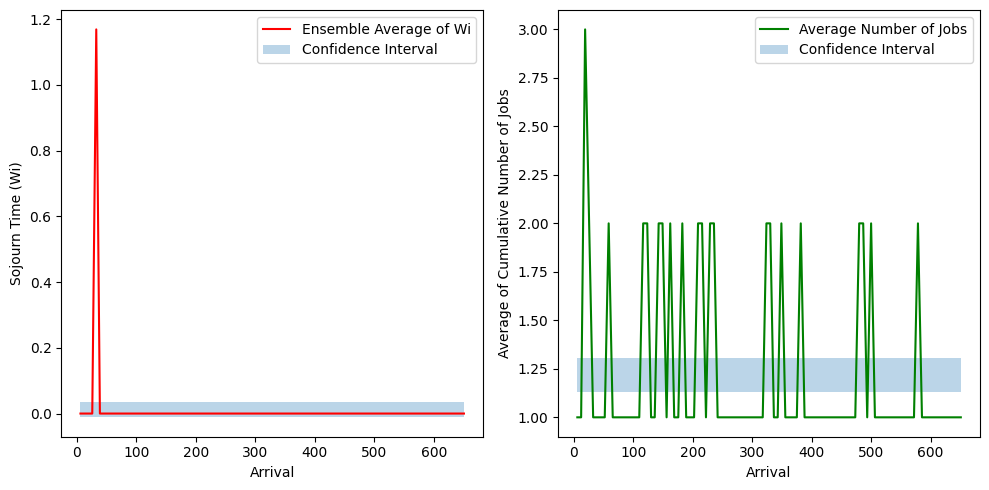

[6.560267568445482, 13.276625650584876, 19.93455264013823, 26.79919788065774, 33.04376933483855, 39.725323355840466, 46.26494291632747, 52.90472691054672, 59.456070784371406, 65.6846338095391, 72.32529273418086, 79.17412370062452, 86.05837518016583, 92.49356968897911, 99.2105000329092, 105.77620891692463, 112.29462570329532, 118.97095964101963, 125.68043692208475, 132.51194467047034, 139.21752605090776, 145.43230529598372, 151.93675902363313, 158.75836904978257, 164.99882468446054, 171.81790478250832, 178.19874262430102, 184.53826404915685, 191.2375414046071, 197.829129446597, 204.58584892702578, 211.363901680419, 217.73285003341556, 223.8695025766321, 230.23923225818757, 236.76915321920373, 243.37008861463508, 249.80158073818214, 256.5529174603241, 263.1031028658649, 269.2638793263087, 276.0186906899079, 282.56282667932607, 288.8883801983838, 295.49321742002155, 301.8177470727264, 308.07849762880886, 314.6934096170144, 320.93950925701756, 327.70260697510344, 334.0159795172551, 340.461

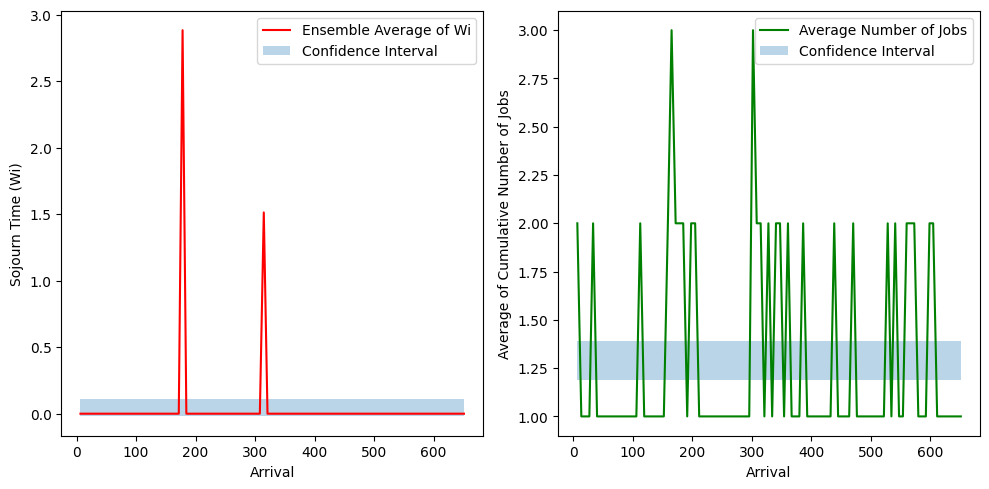

[6.348483988334458, 12.853280459375583, 19.230508501196088, 25.685955686451177, 32.46341039179439, 38.84479182848234, 45.069130287209276, 51.61000274875312, 58.05730997806638, 64.94164220785593, 71.68306206873719, 78.43437370767398, 85.30427268862509, 91.93287248581106, 98.05469243236922, 104.46754559131982, 111.20125661264296, 117.3428934447765, 123.51523075658454, 129.9745629007974, 136.77317758422657, 143.41910546009063, 150.033726539341, 156.81105796127056, 163.68968913439485, 169.9841348817105, 176.73305645144504, 183.28452363377713, 189.5984770908212, 195.84082844388018, 202.67924547781053, 209.35066250363676, 215.86561264343254, 222.63955399543713, 229.435359713889, 235.9176132449533, 242.20776717444397, 248.50760860656098, 254.95844849576432, 261.1272950397729, 267.39711630117955, 274.25713189257766, 280.85635023531, 287.4336753006961, 293.55668138701395, 300.16971596871696, 306.8395848281934, 313.07987075081587, 319.2969852340039, 325.5514536864768, 331.8134004488297, 338.3572

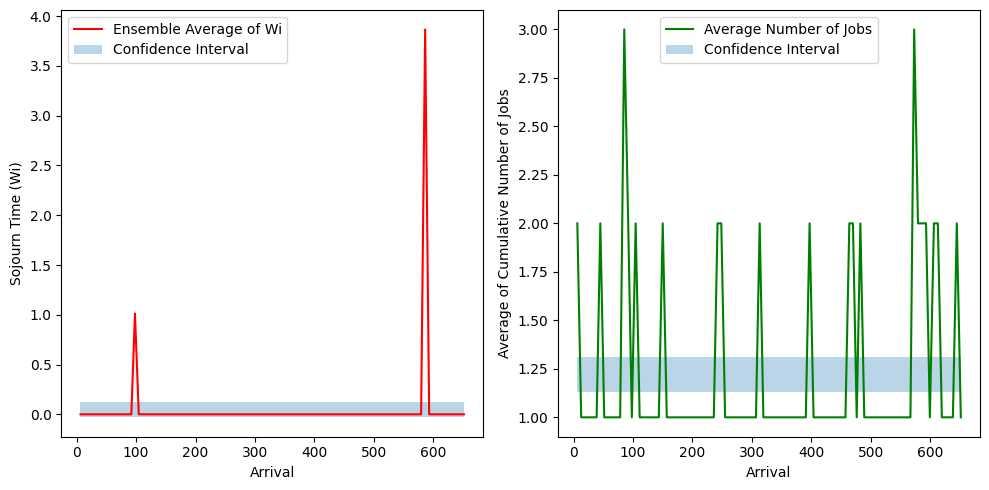

[6.894357346454838, 13.200922308674222, 19.743940589606108, 25.982588871172986, 32.70265884675398, 39.48674011360349, 46.130507327272774, 52.449468140694776, 59.34496643623291, 66.10543862340961, 72.74339754526868, 79.33477787414826, 85.61237878910245, 92.17964238482702, 99.04042013661555, 105.42518117935494, 111.86095864834168, 118.55778561652029, 124.9703292729223, 131.3559615490357, 137.497191869425, 144.27189543790243, 150.59637641608168, 157.10535950400399, 163.97275531763106, 170.56028880274565, 176.86593653679392, 183.67806021517052, 190.31213466536357, 196.71606786768396, 202.96903030597673, 209.2299428687787, 215.78597040977627, 222.09937069651454, 228.50394996127008, 235.12766024248955, 241.34470086849646, 247.8325142650339, 254.07283390398774, 260.6481632021804, 267.26699753582676, 273.53789756092755, 280.299439458473, 286.81699142954017, 293.0492338607707, 299.5027520545626, 306.33825451720867, 313.22794079327866, 319.77872829426127, 326.1410266208556, 332.92945795770066, 3

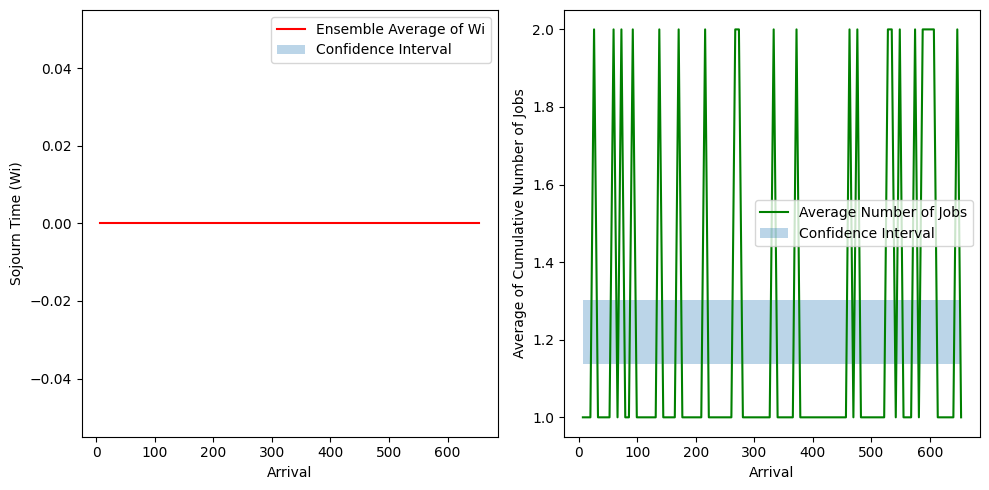

[6.310216892862069, 12.48756440847296, 18.823097289445304, 25.30595163977516, 31.49027684030108, 37.70366020537871, 44.435959887249176, 50.812591023136, 57.5297170165048, 63.772404066913296, 70.14225168738908, 76.26397083729631, 83.13592095645545, 89.49048470523805, 95.96049749316009, 102.40925415412285, 108.68498912329838, 115.09445988344336, 121.2870208985413, 127.48602309482138, 133.85274690707618, 140.7305619625184, 147.15357358852575, 153.3299434344466, 159.78698217625833, 166.5799046899274, 173.2174255519616, 179.75026835460577, 186.46706872617617, 192.61663687246727, 199.24261043434154, 205.89865449359314, 212.57224619444, 218.96409732992927, 225.84462453722188, 232.17590984954566, 238.91516465098942, 245.6623718017092, 251.97101991938027, 258.5693860678373, 265.1130150162867, 271.65667704589947, 278.500934115581, 284.9386862310111, 291.47361415286366, 298.3643583585501, 304.73109841242325, 311.1206693638745, 317.9000329308976, 324.6810468584654, 330.8393988425642, 337.164036223

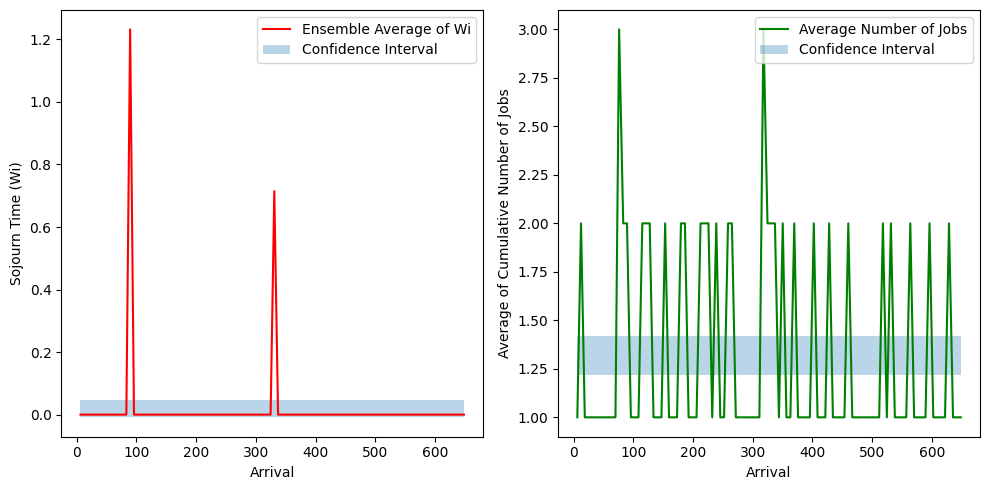

[6.5636873303828756, 13.40470524229735, 19.72285846047063, 26.221073702119575, 32.84327428411055, 39.448232208111804, 45.60736425681225, 52.28056105924804, 58.560323084601144, 64.99031893245376, 71.23305567346716, 78.06110974790236, 84.68536410273592, 91.53299128352418, 98.19345790034158, 104.89197119152627, 111.58115813322459, 118.11533550097394, 124.63171390334193, 130.98442770737708, 137.8649238011084, 144.21670893079605, 150.56458518521416, 157.09821930507616, 163.50944754304578, 169.90924015844595, 176.0798186493419, 182.34489575519757, 188.99186785411882, 195.5707645103158, 201.7185056640081, 208.00424670455388, 214.85212017006708, 221.14560130678046, 227.99550345647108, 234.14600341732623, 241.03413804801164, 247.44919872855277, 253.86421754087985, 260.64013268229445, 266.873966894822, 273.5303714460159, 280.04862228013286, 286.16112238238037, 292.5466641269672, 298.98029054816806, 305.19363022722274, 311.7922891274851, 318.6462468574386, 325.11825066159713, 331.60498310499815, 

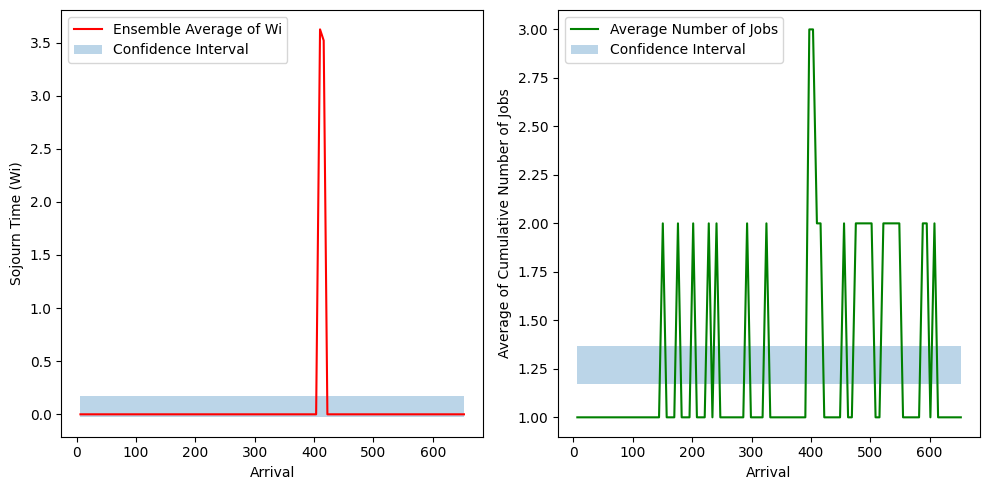

[6.554480755551958, 12.704215657333926, 18.870064648031594, 25.63704905794558, 32.281340323434556, 38.540243049989115, 45.31023070258899, 51.56360981830298, 58.23163468483127, 64.87698691897731, 70.99084385657217, 77.8718445227615, 84.71684926139879, 91.29499061451982, 98.14131783511687, 104.72210877027676, 111.48275148428016, 118.05118693627915, 124.32939229145637, 131.1949343556327, 137.9193463897065, 144.23628057953704, 150.73570079938497, 157.44536600115578, 163.8053687316478, 170.17120807913298, 176.38824157323884, 182.8127881185254, 189.54947489085416, 195.78199807192078, 202.1340006380283, 208.75856257969974, 215.1548435982169, 221.69657560811342, 227.85021426275233, 234.1690441126353, 240.60125190765123, 246.72869141218095, 253.0433024397563, 259.6848155318915, 266.43703929954336, 272.97768004920835, 279.35253107495356, 286.2189805548717, 292.4150324880016, 298.57996240132394, 305.4188171312917, 311.8306049834903, 318.5826958535471, 324.92870612895547, 331.78578468431925, 338.1

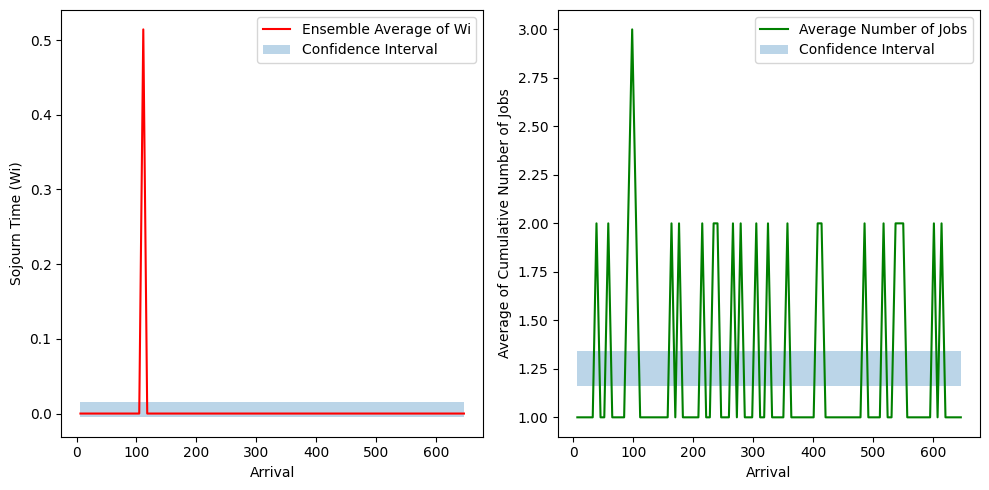

[6.700830464414594, 13.286015223182542, 19.433152830759774, 26.182027071385733, 32.89611962037505, 39.48614205387123, 46.03191460468513, 52.42355982755906, 58.9502150978737, 65.17085170185211, 71.45519357609398, 78.19142384079657, 84.4453740256744, 90.86597875798505, 97.3684453977957, 103.4850912324545, 110.33531568597479, 116.55936988517982, 123.2468773695302, 129.47159608788726, 136.36264388456186, 142.7804894737153, 149.67040357245634, 155.81657629629512, 162.09883520551455, 168.33214350516093, 174.72665506605543, 181.3046146553951, 187.48115777968715, 194.09724954292886, 200.9305116354756, 207.72859580393234, 214.04714106954756, 220.1792489464792, 226.2945334951559, 232.5278642558873, 238.67475608712306, 244.95676179338096, 251.8483316565944, 258.0156708667543, 264.21388458992107, 270.7368593777291, 277.11208395589614, 283.59648975863956, 290.27027664010757, 296.5084260283473, 302.7782106229564, 309.5087577154059, 315.88469213289915, 322.00287365913994, 328.6085320480487, 335.45405

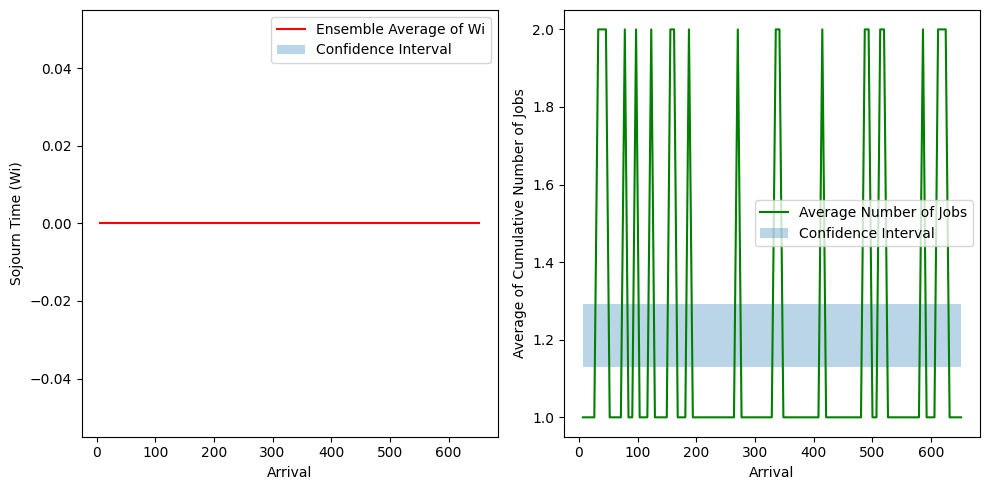

[6.396615717044847, 12.534615698050843, 19.149567165827904, 25.28351626857958, 31.693605864304494, 37.84585508277836, 44.52110910907092, 51.12733877250856, 57.410177231212366, 63.83845679811158, 70.38826057304475, 76.71858045309733, 83.2603674837638, 89.58735004721834, 96.4365396063917, 103.15461417723108, 109.27756404501763, 115.8049672661048, 121.97168638070623, 128.69542739182506, 135.1694760148315, 141.49222030043333, 148.05418740694776, 154.7687820959701, 161.00949963430816, 167.8679099479606, 174.46322813438755, 181.21294796052345, 187.8137161441749, 194.02853964808594, 200.8595833100126, 207.0499712311773, 213.60491233087404, 220.10854549224754, 226.77424635869505, 233.13544329377837, 239.92401084074692, 246.79204485086672, 253.36933346435774, 260.15774547280984, 266.6865476608185, 273.2679990587696, 279.5842619619042, 286.29373189717336, 292.5282865613332, 298.7296243801773, 305.50352883026943, 312.2931020467846, 318.70475557365893, 324.97564882361394, 331.7697354025894, 338.62

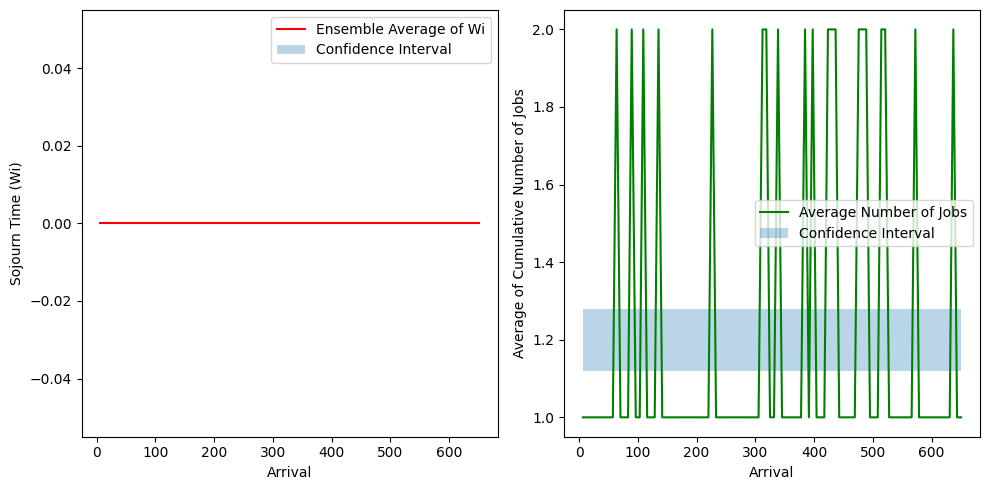

[6.184394377571669, 12.803124857591303, 19.03105560261089, 25.644687001810578, 32.00311309667671, 38.43374914266552, 44.67254047675028, 50.85041766036691, 57.46400019031898, 63.910317752081795, 70.28488979944666, 76.613252237128, 83.39541152577075, 90.25132430227816, 96.53454092191916, 103.27005855824139, 109.46569139919386, 116.25646509787111, 122.98534077166666, 129.45851000023333, 136.13470464929168, 142.43449492248257, 148.8896836785694, 155.05950107263388, 161.19875330735562, 167.42515631323707, 173.61601998672575, 180.1930799688267, 186.91408401463434, 193.7653397323294, 199.968017812429, 206.21210702438907, 212.50049439459113, 218.79298585476175, 225.61576854412502, 232.40549487046243, 238.97551595892122, 245.2378881050964, 251.45193269209486, 258.23943985780693, 265.11115516290573, 271.26826330442645, 278.13646298311926, 284.94419548955267, 291.6252082776363, 298.37967441244473, 304.5016029913739, 311.3621181610062, 317.9808100216457, 324.42133544483397, 331.29256653937557, 338

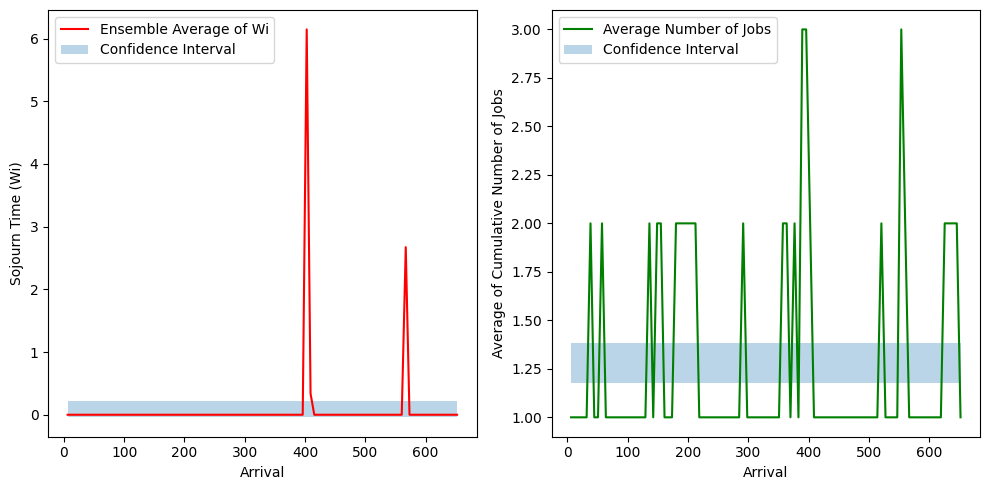

[6.68513389937064, 13.464789447206533, 19.76861818338198, 26.289276617001395, 32.83303163520507, 39.05570402527636, 45.56324483213238, 51.974250639503765, 58.760808484799476, 65.62816587036257, 71.83988667025925, 77.96982920090664, 84.13970993985609, 90.97029487951883, 97.42286933632978, 103.57329935445925, 110.11219843428907, 116.76309576788131, 123.45797635967719, 130.1095404231058, 136.45083994422907, 143.04877766967581, 149.88681347554282, 156.18056469456886, 162.63674299973968, 168.83160008924045, 175.41549253499446, 182.2023454842215, 188.6911344514733, 195.15581811768158, 201.57549156399193, 207.85756721617113, 214.1623213218317, 220.67357236189892, 227.4141315006892, 233.7948814077916, 240.48087636322202, 246.88733014617998, 253.53671678300128, 259.709976723176, 266.51603859119126, 272.9327959069164, 279.4934424583787, 285.8893316402339, 292.34333191425094, 298.9525444674772, 305.7313125326525, 312.2550534838333, 318.38089299658975, 324.50865930747324, 330.7220819957403, 337.11

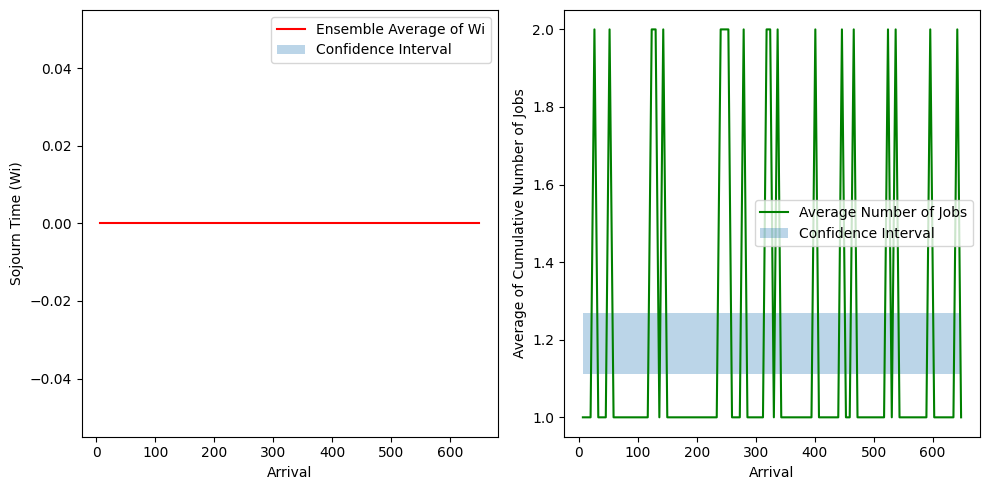

[6.200106117977663, 13.093745413831975, 19.946950568022707, 26.5598523746152, 32.699205220315626, 39.06477601156463, 45.26210982232225, 52.01194781006715, 58.825353669627056, 65.70460530692671, 72.18071779829076, 78.73476760355273, 85.50355425655914, 92.06790793653681, 98.19654600718646, 104.64682324542825, 110.81147350936348, 116.99531312320292, 123.19643120941996, 129.97581528119184, 136.71714765174542, 143.55853350102032, 150.3976491006425, 156.69297935558143, 163.07241400154646, 169.67709092363742, 175.84271157938076, 182.68721170495022, 189.21496693056133, 195.76510235097334, 202.2490029253592, 208.75004138142657, 215.1769656284663, 221.55403938237038, 228.35803509247268, 234.61833449122554, 241.08802254129452, 247.24389231651972, 253.73826313832032, 260.39372545702446, 267.0395154201228, 273.3368769380247, 279.9884350447767, 286.4886954842703, 293.09418710040023, 299.6593256277973, 305.88540720019927, 312.23938496323854, 318.3649400070448, 324.76626370721385, 331.33295474353935, 

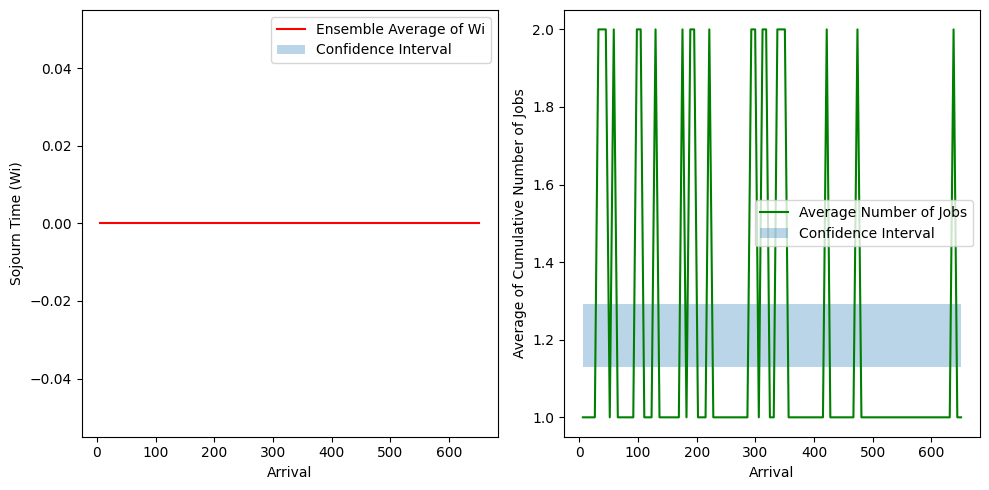

[6.129161067052108, 12.918162510534694, 19.575785678659223, 26.43061278980428, 32.68688272345348, 38.91229200228424, 45.48699023094861, 51.82887850004095, 58.21815271891329, 64.97548284621425, 71.81409507560957, 78.53750707839491, 85.17868769270895, 92.0036763482427, 98.31324401359106, 104.54571192942917, 110.8040404621981, 117.63150586838789, 124.3031996548328, 130.46521054327835, 137.1480449183104, 144.03289277322028, 150.67842287092512, 156.99443126591498, 163.8635690395927, 170.42252213606733, 177.27711416649746, 183.7086785988858, 190.2506740389646, 196.48215509338036, 203.03980024907113, 209.82216061277762, 216.32165350460068, 222.643177170177, 229.34305031360245, 235.76518751188829, 242.65478083074413, 248.8465970813014, 255.01097324982592, 261.3866135616999, 268.00536406670875, 274.6778196355386, 280.9325942461444, 287.4018285321465, 293.58922135036863, 300.4435258842821, 306.8030176087166, 313.46344993820435, 319.7950249710407, 326.30342620625163, 333.04421933445053, 339.83647

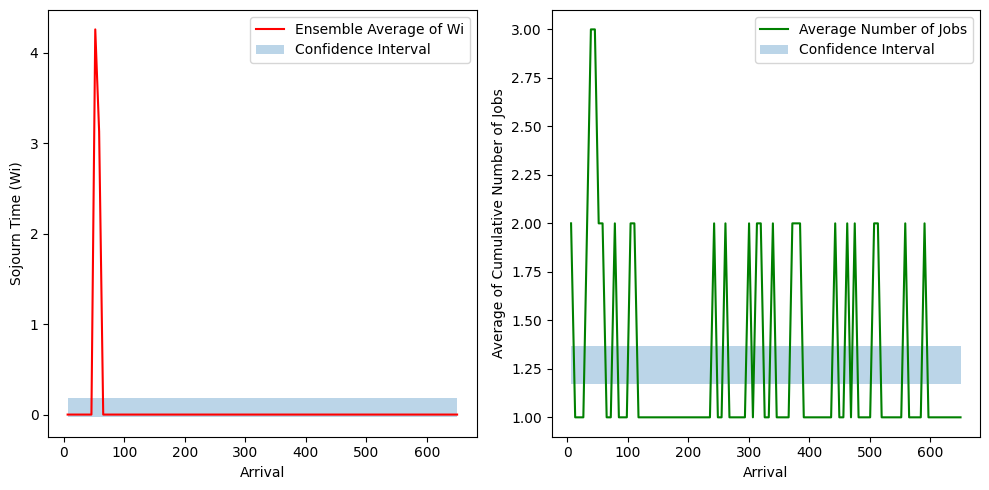

Warmup period for p = 0.6 and 30 replications: [1, 95, 1, 1, 1, 20, 22, 1, 91, 87, 27, 4, 26, 89, 96, 24, 31, 4, 26, 89, 1, 13, 62, 16, 1, 1, 61, 1, 1, 7]
[6.848066950536139, 13.26461438693569, 19.570347518739638, 25.896510631961803, 32.065753998158655, 38.425434250448795, 45.17976864833517, 51.408617392811145, 57.93625478334187, 64.51242504563734, 70.84175755131068, 77.3524817468165, 84.19781025253407, 90.66954435785777, 97.5528671042163, 103.81639613977016, 110.10625390967562, 116.89114263433346, 123.26138883286158, 129.48214381770265, 136.34417561298065, 142.45725413179858, 148.67839787720453, 154.9477071475654, 161.41412441371952, 167.93063272805952, 174.07609659618277, 180.5234959367013, 186.88919437973942, 193.7822592553269, 200.02578983214102, 206.86896750839378, 213.7300586729973, 219.94200605939727, 226.74402710889777, 233.29301472022667, 239.63549129886144, 245.8081556860841, 252.38090326344104, 258.5262670197545, 264.6448031175982, 270.8626859862205, 277.23603408914283, 283.

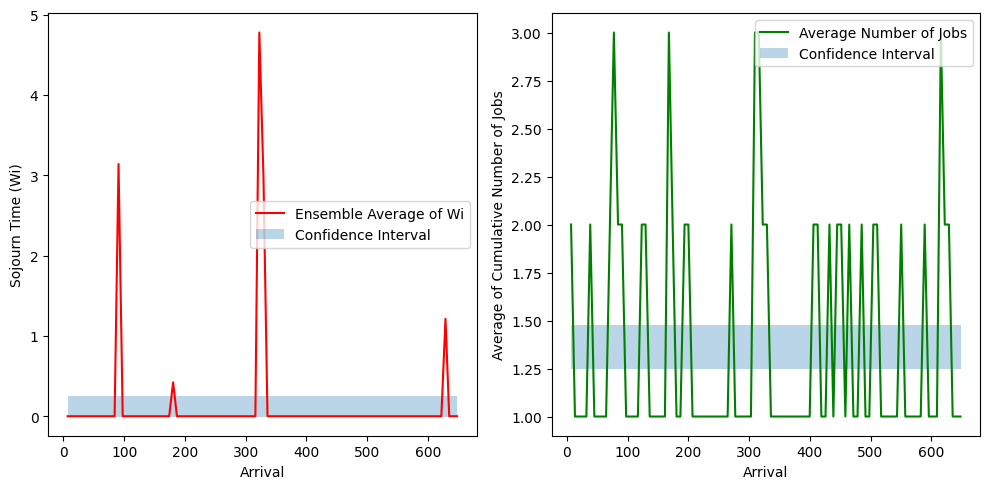

[6.8227326865641515, 13.396135287425034, 19.92494151567788, 26.108627665384915, 32.49910144025712, 38.6396482357953, 45.442237038505226, 51.9528160051137, 58.66554920869695, 65.0141690010906, 71.38417268737895, 77.952826708706, 84.80194889215048, 91.09638670895876, 97.29605326925747, 103.40760698093725, 109.54264620074333, 116.34134307245215, 123.06371135444152, 129.2138964613052, 135.36331161368855, 142.2271392864148, 148.6367940546011, 155.29237937977018, 161.5293900400949, 167.76214103932128, 173.9473959030889, 180.16111675166334, 186.51622677048587, 192.6786403970613, 199.14675248204043, 205.2790021352583, 212.129074343248, 218.52237249661846, 225.09486920918738, 231.696016440382, 238.3090660596351, 244.90718776632866, 251.79358102692677, 258.4597974251373, 264.9162946296627, 271.4523921089222, 277.62848395139224, 283.8086652128251, 290.49653229498693, 296.7684481442402, 302.94112602015076, 309.81456770433584, 316.6159935985413, 323.48208612772953, 329.6819485453655, 335.7997621930

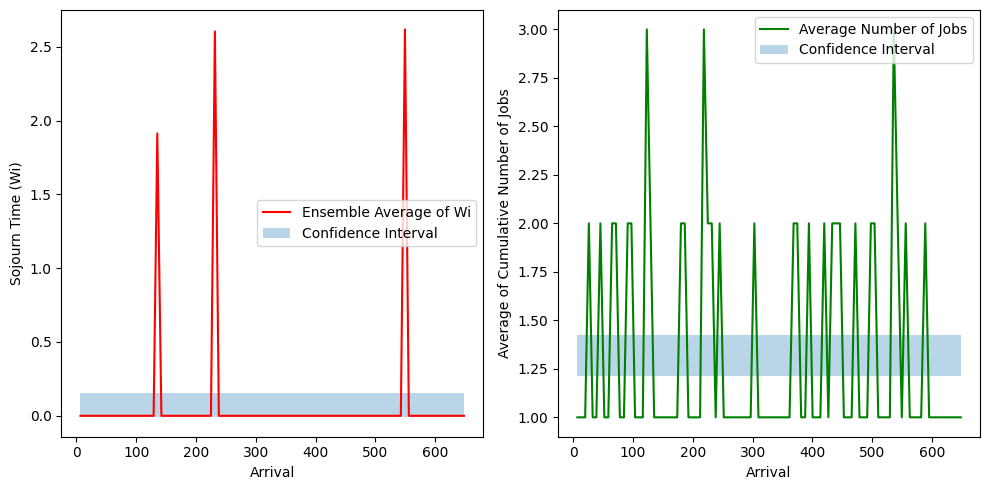

[6.3137641118542325, 12.543229472232618, 19.036633244935523, 25.701429298366726, 32.26738250113593, 38.464547053790724, 44.59343907498001, 51.446311251084474, 57.73778077528978, 64.45152440371822, 70.74735190934143, 77.39961971771349, 83.76647199624361, 90.35315031163047, 97.19056058414024, 104.03346099414446, 110.63082480519104, 116.88684347837692, 123.31253303649034, 129.7896580483888, 136.2375238918048, 142.56178506610053, 149.2540367884721, 155.8376419961182, 162.35045174087668, 169.12725392371672, 175.8182515105119, 182.31871462021482, 189.01851140365054, 195.62908241791428, 201.88097039052664, 208.01185461750853, 214.31275710125692, 220.82920113105092, 227.24526667427605, 233.68283700220653, 240.17175202385414, 246.57171010985255, 253.05411211957565, 259.95143837684964, 266.6735767598783, 273.43289755286315, 279.9166383967767, 286.1897580243265, 292.7345310823158, 299.08041186483337, 305.38789181093614, 311.89759877602285, 318.36332852616715, 325.13800384501076, 331.4191853948504

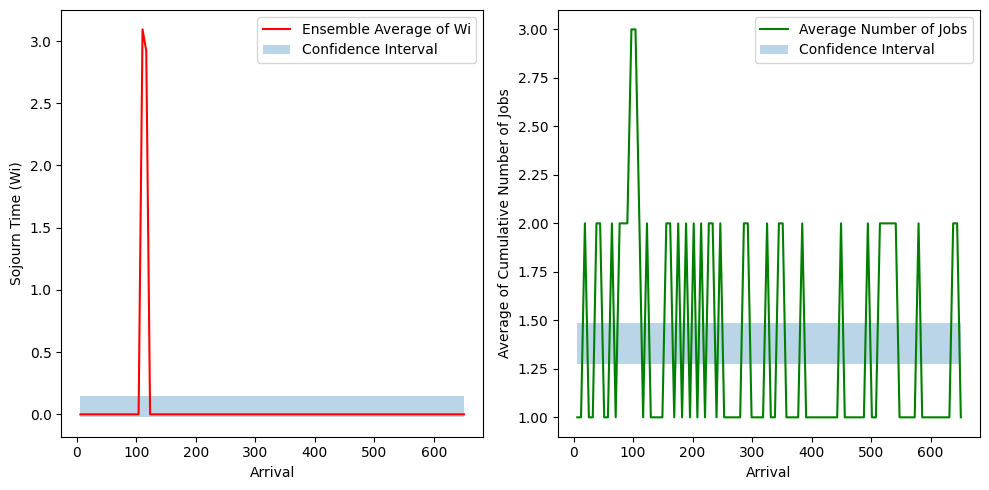

[6.527488783273785, 12.789857104396194, 19.20938807854688, 25.324158686427452, 31.826447482703852, 38.5310407452517, 45.15576521453963, 52.00201550647084, 58.605749442940485, 65.09048614380052, 71.29346570053538, 77.80376307307499, 84.3392789334847, 91.16925537525736, 97.78225128919148, 103.99108050890466, 110.84985586006272, 117.35125049444864, 123.69946916308247, 130.54125851142163, 136.98593135017492, 143.17295267351378, 149.53933251116086, 156.18132356794365, 162.4745713672591, 169.23491337010407, 175.94003656607057, 182.1468217711417, 188.9174955427363, 195.44713951728494, 202.2794608325881, 208.7034553577953, 215.11212363843197, 221.89862337510203, 228.03322353166539, 234.84592100719956, 241.65259207003513, 247.92030490746262, 254.74492973814503, 261.6246263543867, 268.0929914047279, 274.8017763985513, 281.0412369108073, 287.54394687035483, 293.8991743671149, 300.7269650578441, 307.1004194192054, 313.9497558512643, 320.37269518259, 326.49386013226416, 333.21346221664237, 339.8888

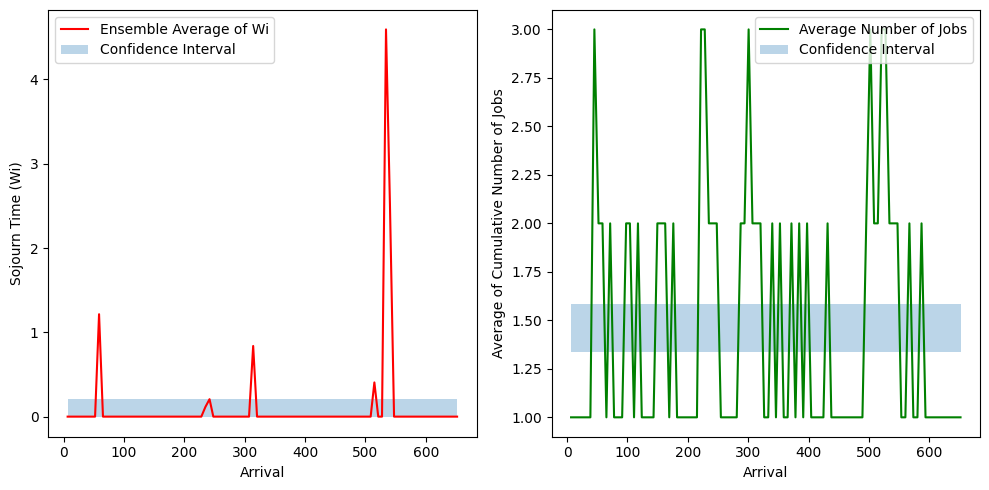

[6.352410638668575, 12.922399062447552, 19.279143661121825, 25.907776112108976, 32.14196063875035, 38.72681386671343, 45.400803154403526, 52.120541187928275, 58.88870818563225, 65.4918765809575, 71.79166898698452, 78.1375719014911, 84.44424021039093, 90.58172541782153, 97.22659274287807, 103.39848690790406, 109.78935488491946, 116.06250904296355, 122.47879655950035, 129.23781248207808, 135.5419330980858, 142.31004018169816, 148.79509955183664, 155.2088510162985, 161.83205241833863, 168.09152296239867, 174.5542952948303, 181.11471550218096, 187.28186716324507, 194.09218568819855, 200.22222363632005, 206.96493324635156, 213.54905681979335, 220.10145038850078, 226.91060776822027, 233.41464711660072, 239.84845198623304, 246.51926797381358, 253.1996969512937, 259.7639361269882, 266.12357838183226, 272.5520451054985, 279.26340764030556, 285.78890673662534, 292.16099661813246, 299.0032675377244, 305.5250182409786, 312.17682218852696, 318.9316246054808, 325.6543041950792, 332.29649167592675, 3

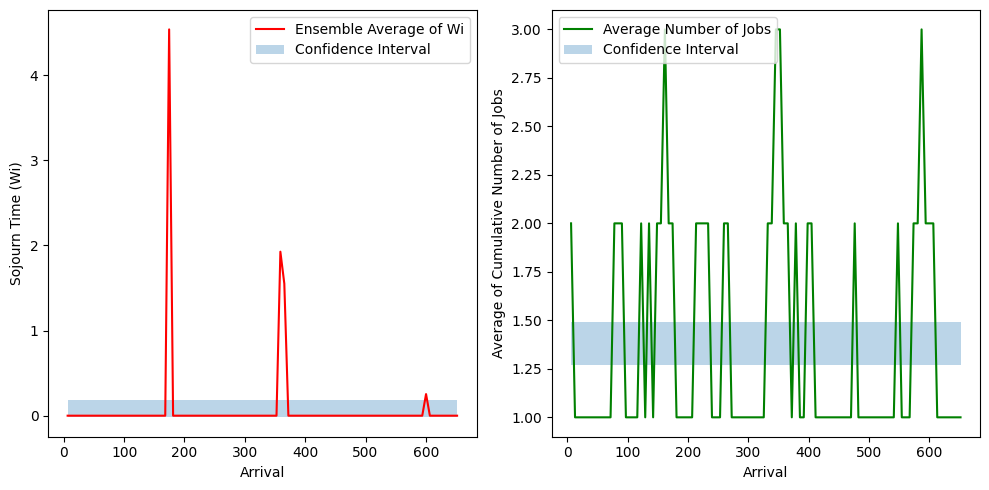

[6.534346070758064, 12.951041932322473, 19.356694863974433, 26.068603880529096, 32.22048891979488, 38.36900847474234, 45.06939910455956, 51.940839721710574, 58.551624358292635, 64.71293575832622, 71.05762506413907, 77.57918771061313, 83.90302024965202, 90.49560909690656, 96.95227006131589, 103.11100278996585, 109.26120820044082, 115.99727465081928, 122.61532519537347, 128.97285950294142, 135.0895599434765, 141.96873350537643, 148.7478816787163, 155.53926609142997, 162.31549722973023, 168.5232436060452, 175.15307086681756, 181.9954787456418, 188.63332714823656, 195.08084940845737, 201.787000996394, 208.37549397201713, 214.5138957804168, 220.76210267536803, 227.11767383002166, 233.69335870486293, 240.42710038512263, 246.97285748492996, 253.31731742726302, 260.01243010215353, 266.689380620435, 273.2970179581524, 279.42974723623803, 286.20626343594745, 292.98887596596114, 299.4695302994402, 306.2781245722253, 312.5210456777211, 318.86478230315817, 325.6626511015721, 332.0956515936719, 338.

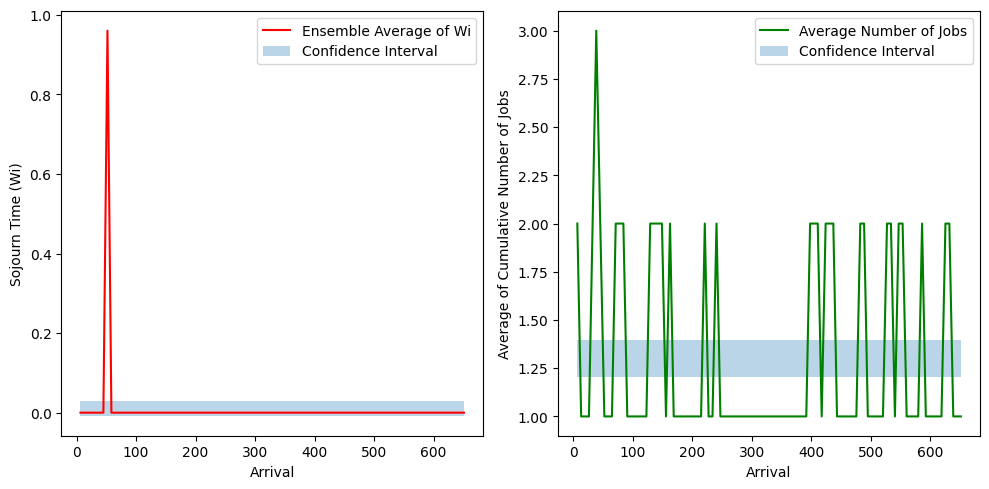

[6.3309696844159316, 13.132902682969037, 19.248764712114507, 25.926865442266102, 32.220861012167504, 39.072851749880314, 45.73168167151889, 52.260409360911225, 58.51160679638019, 64.86530761185615, 71.17006891766806, 77.4436889587012, 84.31605097419076, 90.44780215342924, 96.75980585501539, 103.58917966965316, 110.418715395228, 117.25857628788975, 123.53286674334748, 130.39548986914744, 136.73233396263345, 142.85617496569935, 148.96733280643772, 155.30470372925222, 161.68781888065092, 167.83060739548836, 174.49320178912868, 181.1470325651225, 187.38347513489427, 194.26426079950846, 200.62670149587126, 207.008337953596, 213.5591116972489, 219.80205734725033, 226.52439537442945, 233.37823162864848, 239.69597331970175, 246.36768307130484, 252.88923843169005, 259.3881847983436, 266.0070489566349, 272.57458338298517, 279.2386756907248, 285.7399595043009, 292.1936268874589, 298.6711384442713, 305.4707660162952, 312.225851126514, 318.7935745766251, 325.39370976997736, 331.63810663978427, 338.

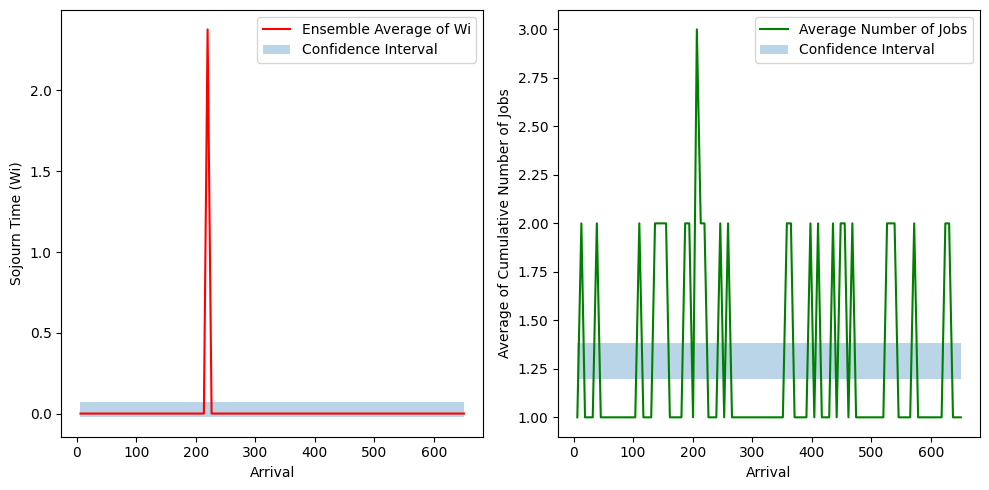

[6.339590046873824, 12.626394801975373, 18.91509032991765, 25.040047148008018, 31.60728602083923, 38.01209895386847, 44.28489745056885, 50.64214829221336, 57.37055110498942, 63.91693585931558, 70.04481117892902, 76.51767701801364, 83.1042952740504, 89.92623746766867, 96.81285511452303, 103.242550352241, 109.40695887201596, 115.63347327546413, 122.46503294794995, 129.1402894050885, 135.43065114702034, 141.9698086023125, 148.39031852746797, 154.52740856078077, 160.69368852619624, 167.22708880994327, 173.56302312854126, 179.83307156411507, 186.29029122232572, 192.75986770731757, 199.02483427656392, 205.87309789500878, 212.4612021782714, 218.6410881911361, 224.92943082782088, 231.3067290718451, 237.91188947740622, 244.24235503076798, 250.7045098039669, 256.8719309052645, 263.6483535519227, 269.98659210081803, 276.76419070666736, 282.9519104401009, 289.39701952791273, 295.87857572882945, 302.75362157440526, 309.6233699492529, 316.4307075327688, 322.9150012406949, 329.1940194632703, 335.5270

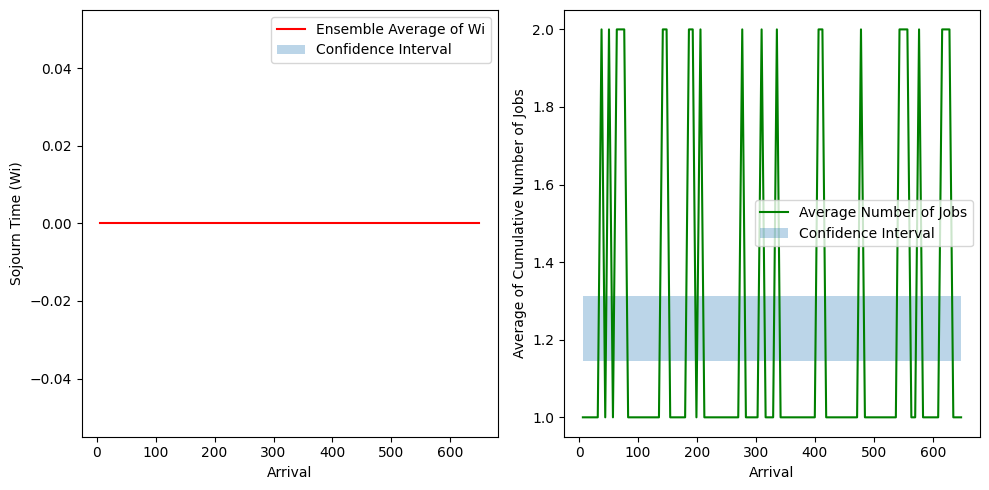

[6.2191112483332365, 12.466849698265658, 18.93788345352448, 25.098653985564688, 31.376967338994486, 37.61350098798643, 44.37134364296259, 51.13741703624515, 57.37098882511811, 63.995914049534875, 70.87365934820879, 77.4680126731314, 84.15900349339488, 90.90819608371588, 97.02405659444919, 103.47210345737858, 110.16379726071108, 116.87139062096057, 123.50607689817869, 130.02809615023696, 136.90184065984562, 143.24950252332903, 149.89146688473886, 156.4637278961044, 162.9488278644796, 169.22775271896467, 176.0682090612214, 182.36196351407446, 189.18593287678323, 195.6949609850072, 202.35542115839667, 209.0329794384552, 215.73866175330033, 221.88803383463835, 228.29417423687056, 234.48509129349145, 240.69735545090367, 247.57148806265667, 254.28044710959392, 260.60378961721534, 267.0983205300627, 273.2781878833137, 279.4888709482477, 285.6156470872697, 292.000269500778, 298.294504849309, 304.6094729448015, 311.0516791407416, 317.3930561743678, 324.0441831194451, 330.716107219113, 337.34365

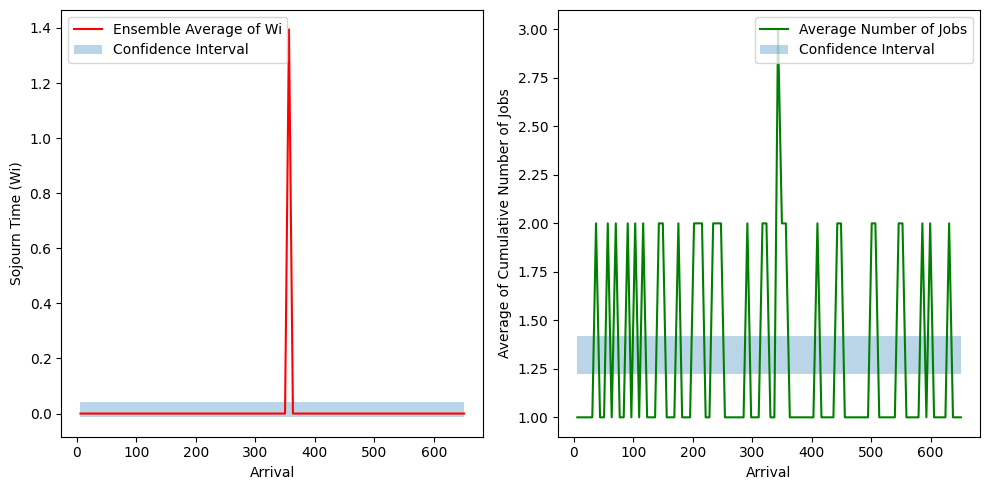

[6.121247382551116, 12.38119453040456, 18.583414611567324, 25.39716503630703, 32.13089589760566, 38.4380892022753, 44.89302204290091, 51.730984771847176, 58.56937352485911, 65.31788013195087, 71.8394988382025, 77.95224806736931, 84.70744750540105, 90.9420619510868, 97.82982654219151, 104.00822890116756, 110.40826280092132, 116.53845806160918, 123.130137365252, 129.9356935144102, 136.74067622505274, 142.98590467357013, 149.21452833375142, 155.5590797751872, 162.24479054953417, 168.91168515774265, 175.30983803110638, 181.55057756786712, 187.82693041142042, 194.04398002546952, 200.9399605085589, 207.36950465297053, 213.52075758239596, 219.76780968435654, 226.36187070612226, 232.60072501724204, 239.01391132594313, 245.90801400946427, 252.16509393009716, 258.36244505651365, 265.10753990472057, 271.26898987231874, 277.9872046520797, 284.75026989872856, 291.026835063801, 297.59041355445424, 304.4573369765776, 311.1399552394631, 317.795113683641, 324.16004163262716, 330.44605165711755, 336.742

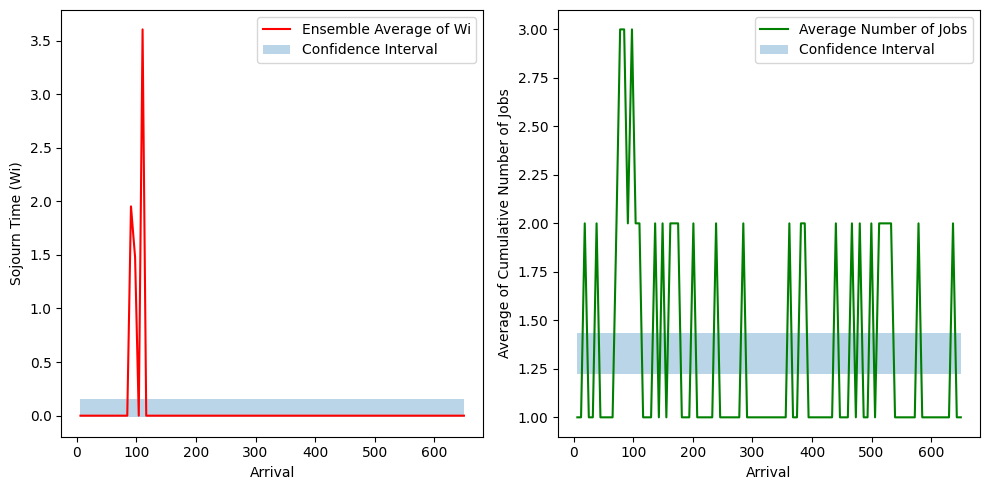

Warmup period for p = 0.7 and 10 replications: [49, 84, 16, 81, 26, 7, 33, 1, 54, 16]
[6.861333265357485, 13.458953616644827, 19.88651505765598, 26.48394660764662, 33.29259281349661, 40.05367624422536, 46.23127403657065, 52.534827316142476, 58.66596861150017, 64.81881694594242, 71.65067638782384, 78.34691232611146, 84.90926770002667, 91.43000397878538, 98.27768941567408, 104.52376980458489, 111.34524866884884, 118.234432342854, 124.36565931978586, 130.9623786181042, 137.67789637703382, 144.22102544152776, 150.94329300579844, 157.82144486527974, 163.9543718447513, 170.377993328821, 177.15895833569988, 184.04899392848108, 190.72413244231714, 196.8471577789846, 203.45436899933893, 210.30439050494417, 216.61786016830882, 223.3888352568477, 230.1087172739964, 236.72113724696376, 242.96297278644877, 249.66510921132328, 256.33742836510817, 262.898515790063, 269.30929425145115, 276.14047681307227, 282.258401645472, 289.084659445522, 295.9719220074739, 302.7981248581716, 309.43828189833215, 316

KeyboardInterrupt: 

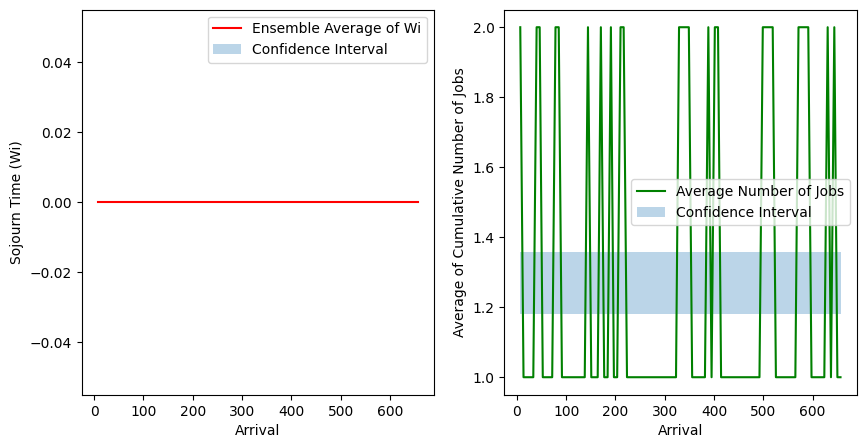

In [46]:
for util in p:
    Ls = util * c  # average number of busy servers =>  ρ = Ls / c = λ / cµ -> Lecture 4 page 26ρ ρ = 0.6
    SERVICE_RATE = ARRIVAL_RATE / Ls   #  µ =  λ / Ls
    for runs in [10,30]:
        warmup_period = []
        RANDOM_SEED = runs * 11
        random.seed(RANDOM_SEED)
        for _ in range(runs):
            arrivals = []
            sojourn_times = []
            cum_num_jobs = []
            env = simpy.Environment()
            server = simpy.Resource(env, capacity=c)
            env.process(job_generator(env, server))
            env.run(until=10000)  # Run simulation for a fixed time

            # Calculate the ensemble averages
            ensemble_wi = np.mean(sojourn_times, axis=0)
            avg_num_jobs = np.mean(cum_num_jobs, axis=0)
            
            """
            # by using normal distribution
            conf_int_wi = st.norm.interval(0.95, loc=ensemble_wi, scale=st.sem(sojourn_times))
            conf_int_avg_num_jobs = st.norm.interval(0.95, loc=avg_num_jobs, scale=st.sem(cum_num_jobs))
            """
            # Calculate confidence intervalsfor ensemble average of wi and average number of jobs with 95% level of significance
            # by using the t-distribution
            conf_int_wi = st.t.interval(0.95, len(sojourn_times) - 1, loc=ensemble_wi, scale=st.sem(sojourn_times)) 
            #scale = np.std(sojourn_times, axis=0) / np.sqrt(len(sojourn_times)))
            conf_int_avg_num_jobs = st.t.interval(0.95, len(cum_num_jobs) - 1, loc=avg_num_jobs, scale=st.sem(cum_num_jobs))
            #scale = np.std(cum_num_jobs, axis=0) / np.sqrt(len(cum_num_jobs)))

            # Plot the convergence graphs
            plot_convergence_graphs(arrivals, sojourn_times, cum_num_jobs, ensemble_wi, avg_num_jobs, conf_int_wi, conf_int_avg_num_jobs)

            # Determine the warmup period length when the values converge
            warmup_len = np.argmax(np.abs(np.diff(sojourn_times))) + 1  # Index where the difference is maximum
            warmup_period.append(warmup_len)

        print(f"Warmup period for p = {util} and {runs} replications: {warmup_period}")
        
        # solve how to create only two plot for 10 and 30 replications. Now it creates 2 plots for each run!!!